In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import rioxarray as rx
from tqdm import tqdm
import seaborn as sns 
import pandas as pd
import xarray as xr
from tqdm import trange, tqdm, tqdm_notebook
from shapely.geometry import Polygon
import cartopy

In [2]:
import rioxarray as rx

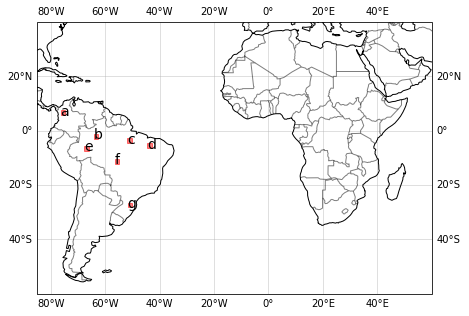

In [3]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1,figsize=(15,5))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
g0 = ax.gridlines(draw_labels=True, alpha =0.5, zorder = -1)

#ax.fill(geometry)
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=.5)
ax.set_xlim(-85,60)
ax.set_ylim(-60, 40)

geometry = np.array([[-76.4921875, 7.48900279105535],
          [-76.4921875, 5.6555093790923925],
          [-74.734375, 5.6555093790923925],
          [-74.734375, 7.48900279105535]])
x = geometry[:,0]        
y = geometry[:,1]
ax.text(geometry[0,0], geometry[1,1], 'a', fontsize = '14', color = 'black')
ax.fill(x, y, c = 'red', alpha = 0.5)

geometry = np.array([[-64.36328125, -1.1027944952856563],
          [-64.36328125, -2.9472651029681876],
          [-62.60546875, -2.9472651029681876],
          [-62.60546875, -1.1027944952856563]]);
x = geometry[:,0]        
y = geometry[:,1]
ax.text(geometry[0,0], geometry[1,1], 'b', fontsize = '14', color = 'black')
ax.fill(x, y, c = 'red', alpha = 0.5)

geometry = np.array([[-51.970703125, -2.8594873052688947],
          [-51.970703125, -4.701094589592704],
          [-50.212890625, -4.701094589592704],
          [-50.212890625, -2.8594873052688947]])
x = geometry[:,0]        
y = geometry[:,1]
ax.text(geometry[0,0], geometry[1,1], 'c', fontsize = '14', color = 'black')
ax.fill(x, y, c = 'red', alpha = 0.5)

geometry = np.array([[-44.587890625, -4.701094589592666],
          [-44.587890625, -6.537847421087335],
          [-42.830078125, -6.537847421087335],
          [-42.830078125, -4.701094589592666]])
x = geometry[:,0]        
y = geometry[:,1]
ax.text(geometry[0,0], geometry[1,1], 'd', fontsize = '14', color = 'black')
ax.fill(x, y, c = 'red', alpha = 0.5)

geometry = np.array([[-67.703125, -5.488978417551024],
          [-67.703125, -7.323077028275151],
          [-65.9453125, -7.323077028275151],
          [-65.9453125, -5.488978417551024]])
x = geometry[:,0]        
y = geometry[:,1]
ax.text(geometry[0,0], geometry[1,1], 'e', fontsize = '14', color = 'black')
ax.fill(x, y, c = 'red', alpha = 0.5)

geometry = np.array([[-56.62890625, -10.448757390049366],
          [-56.62890625, -12.258261112907766],
          [-54.87109375, -12.258261112907766],
          [-54.87109375, -10.448757390049366]])
x = geometry[:,0]        
y = geometry[:,1]
ax.text(geometry[0,0], geometry[1,1], 'f', fontsize = '14', color = 'black')
ax.fill(x, y, c = 'red', alpha = 0.5)

geometry = np.array([[-51.794921875, -26.553006267681724],
          [-51.794921875, -28.19197170634869],
          [-50.037109375, -28.19197170634869],
          [-50.037109375, -26.553006267681724]])
x = geometry[:,0]        
y = geometry[:,1]
ax.text(geometry[0,0], geometry[1,1], 'g', fontsize = '14', color = 'black')
ax.fill(x, y, c = 'red', alpha = 0.5)

"""
geometry = np.array([[24.52749780572593, 6.412965178130758],
          [24.52749780572593, 4.532015585894342],
          [27.38394311822593, 4.532015585894342],
          [27.38394311822593, 6.412965178130758]])
x = geometry[:,0]        
y = geometry[:,1]
ax.text(geometry[0,0], geometry[1,1], 'h', fontsize = '14', color = 'black')
ax.fill(x, y, c = 'red', alpha = 0.5)
"""
plt.show()

## For South America

#### SA_a

In [3]:
geometry = np.array([[-76.4921875, 7.48900279105535],
          [-76.4921875, 5.6555093790923925],
          [-74.734375, 5.6555093790923925],
          [-74.734375, 7.48900279105535]])

In [4]:
## Download and add the tree cover data here
TC_MOD44B = xr.open_dataset('/home/chandra/data/MOD44B_Treecover/Tropic_250m/MOD44B.006_250m_aid0001.nc').Percent_Tree_Cover[:,::-1].sel(lat = slice(geometry[2,1],geometry[0,1]), 
                                                                                                                                         lon = slice(geometry[0,0],geometry[2,0]))
TC_MOD44B = TC_MOD44B[:,:,:]
TC_MOD44B

<xarray.DataArray 'Percent_Tree_Cover' (time: 20, lat: 880, lon: 843)>
[14836800 values with dtype=float32]
Coordinates:
  * time     (time) object 2000-03-05 00:00:00 ... 2019-03-06 00:00:00
  * lat      (lat) float64 5.657 5.659 5.661 5.664 ... 7.482 7.484 7.486 7.489
  * lon      (lon) float64 -76.49 -76.49 -76.49 -76.48 ... -74.74 -74.74 -74.74
Attributes:
    grid_mapping:  crs
    valid_min:     0
    valid_max:     100
    long_name:     Percent_Tree_Cover

In [5]:
#TC_MOD44B = TC_MOD44B[:]

In [6]:
TC_MOD44B = TC_MOD44B.where(TC_MOD44B != 200)

In [7]:
TC_MOD44B = TC_MOD44B.where((TC_MOD44B > 20))

In [8]:
## Download and add the tree cover data here
Landuse = xr.open_rasterio('/home/chandra/data/Paper2/Landuse_Globcover_250m_SA.tif')[0,::-1].sel(y = slice(geometry[2,1],geometry[0,1]), 
                                                                                          x = slice(geometry[0,0],geometry[2,0]))
for classes in [11,14,20,30,190,200,210,220]:
    Landuse = Landuse.where(Landuse != classes)
Landuse = Landuse[:,:-1]
Landuse

<xarray.DataArray (y: 880, x: 843)>
array([[nan, nan, nan, ..., 40., 40., 40.],
       [40., 40., 40., ..., 40., 40., 40.],
       [40., 40., 40., ..., 40., 40., 40.],
       ...,
       [40., 40., 40., ..., 40., 40., 40.],
       [40., 40., 40., ..., 40., 40., 40.],
       [40., 40., 40., ..., 40., 40., 40.]])
Coordinates:
    band     int64 1
  * y        (y) float64 5.657 5.659 5.661 5.663 ... 7.482 7.484 7.486 7.488
  * x        (x) float64 -76.49 -76.49 -76.49 -76.49 ... -74.74 -74.74 -74.74
Attributes:
    transform:      (0.0020833333331467, 0.0, -90.0013888888889, 0.0, -0.0020...
    crs:            +init=epsg:4326
    res:            (0.0020833333331467, 0.0020833333331467)
    is_tiled:       1
    nodatavals:     (nan,)
    scales:         (1.0,)
    offsets:        (0.0,)
    AREA_OR_POINT:  Area
    DataType:       Generic

In [9]:
TC_MOD44B = TC_MOD44B.where(Landuse.values > 0)

<ipython-input-9-6e84aafc7bbd>:1: RuntimeWarning: invalid value encountered in greater
  TC_MOD44B = TC_MOD44B.where(Landuse.values > 0)


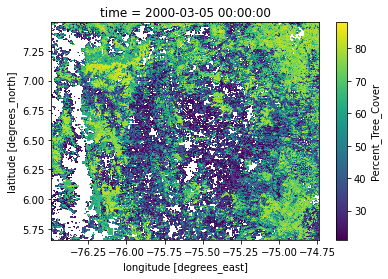

In [10]:
TC_MOD44B[0].plot()

In [ ]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

fig, ax = plt.subplots(1,1,figsize=(5,5))

ax.text(2000,0,str(r'$S_{\mathrm{r}}$ = '+str(round(float(Sr.median().values),2))+' mm'), fontsize = 13)

TC_MOD44B_mean = np.nanmean(TC_MOD44B, axis = (1,2))

ax2 = ax.twinx()
colormat=np.where(SPEI_PM.to_dataframe()['spei']>0, '#045a8d','#de2d26')
ax2.bar(np.linspace(2000,2018.9167,228), SPEI_PM, width = 0.083, alpha = 0.7, color = colormat, edgecolor = 'none')
ax2.set_ylim(-10,3);
ax2.set_yticklabels([' ',' ',' ',' ',-2,0,2], color = '#636363');
ax2.text(2020.5,0.90, 'Wet↑', fontsize = 15, rotation = 0, color = '#045a8d')
ax2.text(2020.5,-1.20, 'Dry↓', fontsize = 15, rotation = 0, color = '#de2d26')
ax.scatter(np.linspace(2000,2019,20), TC_MOD44B_mean, color='#dfc27d', s = 40, alpha = 1, edgecolor = '#543005')
sns.regplot(x=np.linspace(2000,2019,20), y=TC_MOD44B_mean, ci = 95, ax=ax, scatter = False, color = '#8c510a', line_kws={'lw': 2})
    
ax.set_ylim(-5,115)
ax.set_xlim(2000-0.5,2020+0.25)
ax.set_ylabel('Tree cover (%)', fontsize = 15, color = '#8c510a')
ax.set_xlabel('Year', fontsize = 15, color = '#969696')
ax.tick_params(axis='both', which='major', labelsize=14);
ax2.tick_params(axis='both', which='major', labelsize=14);
ax2.text(2023.5,-0.60, 'SPEI', fontsize = 15, rotation = 270, color = '#969696')

ax3 = ax.twinx()
#ax3.set_ylabel(r"Burned area (km$^2$)", fontsize = '14', rotation = 270)
p3, = ax3.plot(np.linspace(2001,2019.99,228), np.array(Fire_summarized).flatten(), color = 'black')
#ax3.axis["right"].label.set_color(p3.get_color())
ax3.spines['right'].set_position(('outward', 70))
#ax3.set_yticklabels([' ',0,1000,2000,' ',' ',' '], color = 'black', fontsize = '12');
ax3.set_ylim(ax.get_ylim()[::-1])
ax3.set_ylim(5000,-100)
ax3.text(2028.5,2500, r"Burned area (km$^2$)", fontsize = 15, rotation = 270, color = 'black')
ax3.tick_params(axis='both', which='major', labelsize=14);


y = np.linspace(2000,2019,20).reshape(-1,1)
X = TC_MOD44B_mean.reshape(-1,1)
reg = LinearRegression()
reg.fit(X, y)
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()

from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(np.linspace(2000,2019,20),TC_MOD44B_mean)

ax.text(2014,0,'p-value: '+str(round(est2.pvalues[1],2)))
#ax.text(2014,5,'R.sq: '+str(round(est2.rsquared,2)))
ax.text(2014,10,'Slope: '+str(round(slope,2)))

In [308]:
Sr = xr.open_dataset('/home/chandra/data/Stable_unstable_paper/Sr_netcdf.nc').mle_gumbel_Layer[::-1].sel(lat = slice(geometry[2,1],geometry[0,1]), 
                                                                                            lon = slice(geometry[0,0],geometry[2,0]))
Sr

<xarray.DataArray 'mle_gumbel_Layer' (lat: 7, lon: 7)>
array([[ 48.133987,  80.36567 ,  95.46397 , 136.1969  , 113.40114 ,
         91.02749 , 116.04476 ],
       [ 70.28196 , 109.79044 , 135.93768 , 143.18094 , 142.1455  ,
        114.34226 , 133.99097 ],
       [ 77.29727 , 143.22604 , 170.97063 , 208.03229 , 172.87263 ,
        144.35765 , 151.77463 ],
       [101.89976 , 179.98424 , 212.26202 , 226.19371 , 183.94095 ,
        167.99603 , 198.21674 ],
       [129.87805 , 194.7577  , 239.85217 , 221.02953 , 187.01534 ,
        194.33418 , 226.96567 ],
       [139.7536  , 181.69638 , 218.08498 , 204.018   , 173.46394 ,
        184.17409 , 189.94513 ],
       [171.99377 , 185.493   , 196.3176  , 211.96725 , 181.99919 ,
        174.09181 , 192.07932 ]], dtype=float32)
Coordinates:
  * lon      (lon) float64 -76.38 -76.12 -75.88 -75.62 -75.38 -75.12 -74.88
  * lat      (lat) float64 5.875 6.125 6.375 6.625 6.875 7.125 7.375
Attributes:
    long_name:       mle_gumbel_Layer
    esri_pe_string:  GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1...
    units:           Degree

In [309]:
SPEI_PM = xr.open_dataset('/home/chandra/data/Stable_unstable_paper/spei12_PM.nc').spei.sel(lat = slice(geometry[2,1],geometry[0,1]), 
                                                                                            lon = slice(geometry[0,0],geometry[2,0]),
                                                                                            time = slice('2000','2018'))
SPEI_PM = SPEI_PM.mean(axis = (1,2))

In [310]:
Fire_summarized = []
for year in (range(2001,2020)):
    Fire = xr.open_mfdataset('/home/chandra/data/MCD64A1-Fire/FireCCI51_'+str(year)+'/'+str(year)+'*-ESACCI-L4_FIRE-BA-MODIS-fv5.1.1cds.nc').burned_area[:,::-1].sel(lat = slice(geometry[2,1],geometry[0,1]), 
                                                                                                lon = slice(geometry[0,0],geometry[2,0]))
    #Fire = np.max(Fire.sum(axis = (1,2)).values/(10**6))
    Fire = (Fire.sum(axis = (1,2)).values/(10**6))
    Fire_summarized.append(Fire.tolist())

<ipython-input-310-c5c0eabd1099>:3: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  Fire = xr.open_mfdataset('/home/chandra/data/MCD64A1-Fire/FireCCI51_'+str(year)+'/'+str(year)+'*-ESACCI-L4_FIRE-BA-MODIS-fv5.1.1cds.nc').burned_area[:,::-1].sel(lat = slice(geometry[2,1],geometry[0,1]),
/usr/lib/python3/dist-packages/xarray/backends/api.py:934: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdatas

<ipython-input-312-286cda20127c>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels([' ',' ',' ',' ',-2,0,2], color = '#636363');


Text(2014, 10, 'Slope: 0.02')

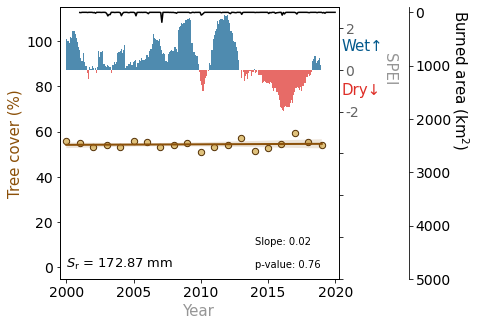

In [312]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

fig, ax = plt.subplots(1,1,figsize=(5,5))

ax.text(2000,0,str(r'$S_{\mathrm{r}}$ = '+str(round(float(Sr.median().values),2))+' mm'), fontsize = 13)

TC_MOD44B_mean = np.nanmean(TC_MOD44B, axis = (1,2))

ax2 = ax.twinx()
colormat=np.where(SPEI_PM.to_dataframe()['spei']>0, '#045a8d','#de2d26')
ax2.bar(np.linspace(2000,2018.9167,228), SPEI_PM, width = 0.083, alpha = 0.7, color = colormat, edgecolor = 'none')
ax2.set_ylim(-10,3);
ax2.set_yticklabels([' ',' ',' ',' ',-2,0,2], color = '#636363');
ax2.text(2020.5,0.90, 'Wet↑', fontsize = 15, rotation = 0, color = '#045a8d')
ax2.text(2020.5,-1.20, 'Dry↓', fontsize = 15, rotation = 0, color = '#de2d26')
ax.scatter(np.linspace(2000,2019,20), TC_MOD44B_mean, color='#dfc27d', s = 40, alpha = 1, edgecolor = '#543005')
sns.regplot(x=np.linspace(2000,2019,20), y=TC_MOD44B_mean, ci = 95, ax=ax, scatter = False, color = '#8c510a', line_kws={'lw': 2})
    
ax.set_ylim(-5,115)
ax.set_xlim(2000-0.5,2020+0.25)
ax.set_ylabel('Tree cover (%)', fontsize = 15, color = '#8c510a')
ax.set_xlabel('Year', fontsize = 15, color = '#969696')
ax.tick_params(axis='both', which='major', labelsize=14);
ax2.tick_params(axis='both', which='major', labelsize=14);
ax2.text(2023.5,-0.60, 'SPEI', fontsize = 15, rotation = 270, color = '#969696')

ax3 = ax.twinx()
#ax3.set_ylabel(r"Burned area (km$^2$)", fontsize = '14', rotation = 270)
p3, = ax3.plot(np.linspace(2001,2019.99,228), np.array(Fire_summarized).flatten(), color = 'black')
#ax3.axis["right"].label.set_color(p3.get_color())
ax3.spines['right'].set_position(('outward', 70))
#ax3.set_yticklabels([' ',0,1000,2000,' ',' ',' '], color = 'black', fontsize = '12');
ax3.set_ylim(ax.get_ylim()[::-1])
ax3.set_ylim(5000,-100)
ax3.text(2028.5,2500, r"Burned area (km$^2$)", fontsize = 15, rotation = 270, color = 'black')
ax3.tick_params(axis='both', which='major', labelsize=14);


y = np.linspace(2000,2019,20).reshape(-1,1)
X = TC_MOD44B_mean.reshape(-1,1)
reg = LinearRegression()
reg.fit(X, y)
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()

from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(np.linspace(2000,2019,20),TC_MOD44B_mean)

ax.text(2014,0,'p-value: '+str(round(est2.pvalues[1],2)))
#ax.text(2014,5,'R.sq: '+str(round(est2.rsquared,2)))
ax.text(2014,10,'Slope: '+str(round(slope,2)))

#### SA_b

In [313]:
geometry = np.array([[-64.36328125, -1.1027944952856563],
          [-64.36328125, -2.9472651029681876],
          [-62.60546875, -2.9472651029681876],
          [-62.60546875, -1.1027944952856563]]);

In [314]:
TC_MOD44B = xr.open_dataset('/home/chandra/data/MOD44B_Treecover/Tropic_250m/MOD44B.006_250m_aid0001.nc').Percent_Tree_Cover[:,::-1].sel(lat = slice(geometry[2,1],geometry[0,1]), 
                                                                                                                                         lon = slice(geometry[0,0],geometry[2,0]))
TC_MOD44B = TC_MOD44B[:,:-1,:]
TC_MOD44B

<xarray.DataArray 'Percent_Tree_Cover' (time: 20, lat: 885, lon: 843)>
[14921100 values with dtype=float32]
Coordinates:
  * time     (time) object 2000-03-05 00:00:00 ... 2019-03-06 00:00:00
  * lat      (lat) float64 -2.947 -2.945 -2.943 -2.941 ... -1.109 -1.107 -1.105
  * lon      (lon) float64 -64.36 -64.36 -64.36 -64.36 ... -62.61 -62.61 -62.61
Attributes:
    grid_mapping:  crs
    valid_min:     0
    valid_max:     100
    long_name:     Percent_Tree_Cover

In [315]:
TC_MOD44B = TC_MOD44B.where(TC_MOD44B != 200)

In [316]:
TC_MOD44B = TC_MOD44B.where((TC_MOD44B > 20))

In [317]:
Landuse = xr.open_rasterio('/home/chandra/data/Paper2/Landuse_Globcover_250m_SA.tif')[0,::-1].sel(y = slice(geometry[2,1],geometry[0,1]), 
                                                                                          x = slice(geometry[0,0],geometry[2,0]))
#Landuse = Landuse[:-1]
for classes in [11,14,20,30,190,200,210,220]:
    Landuse = Landuse.where(Landuse != classes)
Landuse = Landuse[:,:-1]
Landuse

<xarray.DataArray (y: 885, x: 843)>
array([[ 40.,  40.,  40., ...,  40.,  40.,  40.],
       [ 40.,  40.,  40., ...,  40.,  40.,  40.],
       [ 40.,  40.,  40., ...,  40.,  40.,  40.],
       ...,
       [ 40.,  40.,  40., ...,  40.,  nan, 180.],
       [ 40.,  40.,  40., ..., 130.,  nan,  nan],
       [ 40.,  40.,  40., ...,  nan,  nan,  nan]])
Coordinates:
    band     int64 1
  * y        (y) float64 -2.945 -2.943 -2.941 -2.939 ... -1.108 -1.106 -1.104
  * x        (x) float64 -64.36 -64.36 -64.36 -64.36 ... -62.61 -62.61 -62.61
Attributes:
    transform:      (0.0020833333331467, 0.0, -90.0013888888889, 0.0, -0.0020...
    crs:            +init=epsg:4326
    res:            (0.0020833333331467, 0.0020833333331467)
    is_tiled:       1
    nodatavals:     (nan,)
    scales:         (1.0,)
    offsets:        (0.0,)
    AREA_OR_POINT:  Area
    DataType:       Generic

In [318]:
TC_MOD44B = TC_MOD44B.where(Landuse.values > 0)

<ipython-input-318-6e84aafc7bbd>:1: RuntimeWarning: invalid value encountered in greater
  TC_MOD44B = TC_MOD44B.where(Landuse.values > 0)


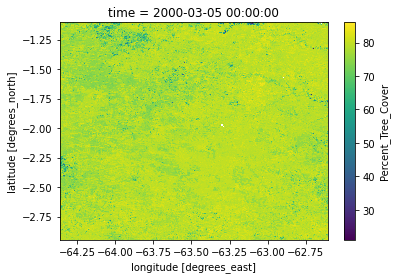

In [319]:
TC_MOD44B[0].plot()

In [320]:
Sr = xr.open_dataset('/home/chandra/data/Stable_unstable_paper/Sr_netcdf.nc').mle_gumbel_Layer[::-1].sel(lat = slice(geometry[2,1],geometry[0,1]), 
                                                                                            lon = slice(geometry[0,0],geometry[2,0]))
Sr

<xarray.DataArray 'mle_gumbel_Layer' (lat: 8, lon: 7)>
array([[ 83.43702 ,  95.49398 ,  96.30454 , 103.961235, 111.27957 ,
        109.6985  , 109.264046],
       [ 73.23746 ,  72.62619 ,  97.48736 , 101.92218 , 103.87081 ,
        110.89897 , 113.189095],
       [ 70.33433 ,  75.14376 ,  89.56961 ,  95.2937  , 106.42788 ,
        108.586105, 118.271614],
       [ 75.79354 ,  82.63617 ,  97.05469 , 110.012856, 112.98656 ,
        107.842415, 114.14537 ],
       [106.07071 , 103.50181 , 114.21643 , 125.493645, 121.3109  ,
        119.61226 , 123.3962  ],
       [132.93979 , 124.5671  , 127.52099 , 132.9163  , 126.49512 ,
        129.09744 , 127.0538  ],
       [137.5766  , 149.91988 , 147.27716 , 139.01585 , 136.31184 ,
        140.47275 , 129.2831  ],
       [154.16946 , 164.86583 , 164.78111 , 155.21436 , 153.95256 ,
        140.80856 , 148.11467 ]], dtype=float32)
Coordinates:
  * lon      (lon) float64 -64.12 -63.88 -63.62 -63.38 -63.12 -62.88 -62.62
  * lat      (lat) float64 -2.875 -2.625 -2.375 -2.125 ... -1.625 -1.375 -1.125
Attributes:
    long_name:       mle_gumbel_Layer
    esri_pe_string:  GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1...
    units:           Degree

In [321]:
SPEI_PM = xr.open_dataset('/home/chandra/data/Stable_unstable_paper/spei12_PM.nc').spei.sel(lat = slice(geometry[2,1],geometry[0,1]), 
                                                                                            lon = slice(geometry[0,0],geometry[2,0]),
                                                                                            time = slice('2000','2018'))
SPEI_PM = SPEI_PM.mean(axis = (1,2))

In [322]:
Fire_summarized = []
for year in (range(2001,2020)):
    Fire = xr.open_mfdataset('/home/chandra/data/MCD64A1-Fire/FireCCI51_'+str(year)+'/'+str(year)+'*-ESACCI-L4_FIRE-BA-MODIS-fv5.1.1cds.nc').burned_area[:,::-1].sel(lat = slice(geometry[2,1],geometry[0,1]), 
                                                                                                lon = slice(geometry[0,0],geometry[2,0]));
    #Fire = np.max(Fire.sum(axis = (1,2)).values/(10**6))
    Fire = (Fire.sum(axis = (1,2)).values/(10**6))
    Fire_summarized.append(Fire.tolist())

<ipython-input-322-6ddf96af6c3d>:3: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  Fire = xr.open_mfdataset('/home/chandra/data/MCD64A1-Fire/FireCCI51_'+str(year)+'/'+str(year)+'*-ESACCI-L4_FIRE-BA-MODIS-fv5.1.1cds.nc').burned_area[:,::-1].sel(lat = slice(geometry[2,1],geometry[0,1]),
/usr/lib/python3/dist-packages/xarray/backends/api.py:934: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdatas

<ipython-input-323-05bb9c2d4c51>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels([' ',' ',' ',' ',-2,0,2], color = '#636363');


Text(2014, 10, 'Slope: 0.01')

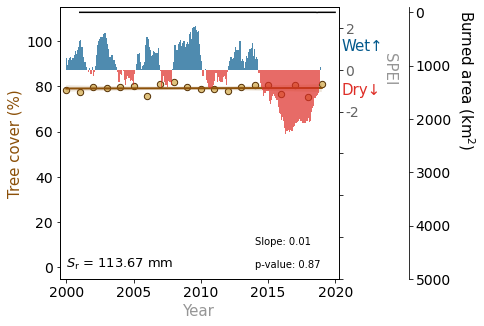

In [323]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

fig, ax = plt.subplots(1,1,figsize=(5,5))

ax.text(2000,0,str(r'$S_{\mathrm{r}}$ = '+str(round(float(Sr.median().values),2))+' mm'), fontsize = 13)

TC_MOD44B_mean = np.nanmean(TC_MOD44B, axis = (1,2))

ax2 = ax.twinx()
colormat=np.where(SPEI_PM.to_dataframe()['spei']>0, '#045a8d','#de2d26')
ax2.bar(np.linspace(2000,2018.9167,228), SPEI_PM, width = 0.083, alpha = 0.7, color = colormat, edgecolor = 'none')
ax2.set_ylim(-10,3);
ax2.set_yticklabels([' ',' ',' ',' ',-2,0,2], color = '#636363');
ax2.text(2020.5,0.90, 'Wet↑', fontsize = 15, rotation = 0, color = '#045a8d')
ax2.text(2020.5,-1.20, 'Dry↓', fontsize = 15, rotation = 0, color = '#de2d26')
ax.scatter(np.linspace(2000,2019,20), TC_MOD44B_mean, color='#dfc27d', s = 40, alpha = 1, edgecolor = '#543005')
sns.regplot(x=np.linspace(2000,2019,20), y=TC_MOD44B_mean, ci = 95, ax=ax, scatter = False, color = '#8c510a', line_kws={'lw': 2})
    
ax.set_ylim(-5,115)
ax.set_xlim(2000-0.5,2020+0.25)
ax.set_ylabel('Tree cover (%)', fontsize = 15, color = '#8c510a')
ax.set_xlabel('Year', fontsize = 15, color = '#969696')
ax.tick_params(axis='both', which='major', labelsize=14);
ax2.tick_params(axis='both', which='major', labelsize=14);
ax2.text(2023.5,-0.60, 'SPEI', fontsize = 15, rotation = 270, color = '#969696')

ax3 = ax.twinx()
p3, = ax3.plot(np.linspace(2001,2019.99,228), np.array(Fire_summarized).flatten(), color = 'black')
#ax3.axis["right"].label.set_color(p3.get_color())
ax3.spines['right'].set_position(('outward', 70))
#ax3.set_yticklabels([' ',0,1000,2000,' ',' ',' '], color = 'black', fontsize = '12');
ax3.set_ylim(ax.get_ylim()[::-1])
ax3.set_ylim(5000,-100)
ax3.text(2029,2500, r"Burned area (km$^2$)", fontsize = 15, rotation = 270, color = 'black')
ax3.tick_params(axis='both', which='major', labelsize=14);

y = np.linspace(2000,2019,20).reshape(-1,1)
X = TC_MOD44B_mean.reshape(-1,1)
reg = LinearRegression()
reg.fit(X, y)
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(np.linspace(2000,2019,20),TC_MOD44B_mean)

ax.text(2014,0,'p-value: '+str(round(est2.pvalues[1],2)))
#ax.text(2014,5,'R.sq: '+str(round(est2.rsquared,2)))
ax.text(2014,10,'Slope: '+str(round(slope,2)))

#### SA_c

In [324]:
geometry = np.array([[-51.970703125, -2.8594873052688947],
          [-51.970703125, -4.701094589592704],
          [-50.212890625, -4.701094589592704],
          [-50.212890625, -2.8594873052688947]])

In [325]:
TC_MOD44B = xr.open_dataset('/home/chandra/data/MOD44B_Treecover/Tropic_250m/MOD44B.006_250m_aid0001.nc').Percent_Tree_Cover[:,::-1].sel(lat = slice(geometry[2,1],geometry[0,1]), 
                                                                                                                                         lon = slice(geometry[0,0],geometry[2,0]))
TC_MOD44B = TC_MOD44B[:,:,:-1]
TC_MOD44B

<xarray.DataArray 'Percent_Tree_Cover' (time: 20, lat: 884, lon: 843)>
[14904240 values with dtype=float32]
Coordinates:
  * time     (time) object 2000-03-05 00:00:00 ... 2019-03-06 00:00:00
  * lat      (lat) float64 -4.701 -4.699 -4.697 -4.695 ... -2.866 -2.864 -2.861
  * lon      (lon) float64 -51.97 -51.97 -51.97 -51.96 ... -50.22 -50.22 -50.22
Attributes:
    grid_mapping:  crs
    valid_min:     0
    valid_max:     100
    long_name:     Percent_Tree_Cover

In [326]:
#TC_MOD44B = TC_MOD44B[:]

In [327]:
TC_MOD44B = TC_MOD44B.where(TC_MOD44B != 200)

In [328]:
TC_MOD44B = TC_MOD44B.where((TC_MOD44B > 20) & (TC_MOD44B < 65))

In [329]:
Landuse = xr.open_rasterio('/home/chandra/data/Paper2/Landuse_Globcover_250m_SA.tif')[0,::-1].sel(y = slice(geometry[2,1],geometry[0,1]), 
                                                                                          x = slice(geometry[0,0],geometry[2,0]))
#Landuse = Landuse[:-1]
for classes in [11,14,20,30,190,200,210,220]:
    Landuse = Landuse.where(Landuse != classes)
Landuse

<xarray.DataArray (y: 884, x: 843)>
array([[40., 40., 40., ..., 40., 40., nan],
       [40., 40., 40., ..., 40., 40., 40.],
       [40., 40., 40., ..., 40., 40., 40.],
       ...,
       [nan, nan, nan, ..., 40., 40., 40.],
       [nan, nan, nan, ..., 40., 40., 40.],
       [nan, nan, nan, ..., 40., 40., 40.]])
Coordinates:
    band     int64 1
  * y        (y) float64 -4.7 -4.698 -4.695 -4.693 ... -2.864 -2.862 -2.86
  * x        (x) float64 -51.97 -51.97 -51.96 -51.96 ... -50.22 -50.22 -50.21
Attributes:
    transform:      (0.0020833333331467, 0.0, -90.0013888888889, 0.0, -0.0020...
    crs:            +init=epsg:4326
    res:            (0.0020833333331467, 0.0020833333331467)
    is_tiled:       1
    nodatavals:     (nan,)
    scales:         (1.0,)
    offsets:        (0.0,)
    AREA_OR_POINT:  Area
    DataType:       Generic

In [330]:
TC_MOD44B = TC_MOD44B.where(Landuse.values > 0)

<ipython-input-330-6e84aafc7bbd>:1: RuntimeWarning: invalid value encountered in greater
  TC_MOD44B = TC_MOD44B.where(Landuse.values > 0)


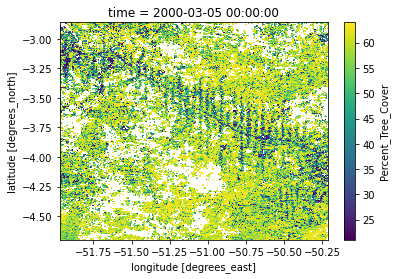

In [331]:
TC_MOD44B[0].plot()

In [332]:
Sr = xr.open_dataset('/home/chandra/data/Stable_unstable_paper/Sr_netcdf.nc').mle_gumbel_Layer[::-1].sel(lat = slice(geometry[2,1],geometry[0,1]), 
                                                                                            lon = slice(geometry[0,0],geometry[2,0]))
Sr

<xarray.DataArray 'mle_gumbel_Layer' (lat: 8, lon: 7)>
array([[546.61316, 521.78754, 509.7752 , 521.31165, 548.04767, 548.0756 ,
        510.49072],
       [508.33176, 519.9553 , 528.8969 , 517.9655 , 530.486  , 530.8751 ,
        511.70618],
       [476.30658, 469.36392, 503.8597 , 495.51465, 503.07596, 505.77237,
        499.2711 ],
       [459.8418 , 489.92892, 489.33853, 503.1233 , 507.6342 , 489.262  ,
        486.79645],
       [474.07864, 514.95605, 492.20422, 488.45117, 481.74548, 465.0687 ,
        443.04663],
       [454.25357, 472.1878 , 478.03607, 486.71793, 508.07178, 518.0501 ,
        505.32428],
       [486.21277, 479.23987, 481.68774, 524.29956, 521.2645 , 518.811  ,
        496.44928],
       [497.97003, 522.2365 , 522.9719 , 539.9589 , 527.14557, 521.8701 ,
        516.0834 ]], dtype=float32)
Coordinates:
  * lon      (lon) float64 -51.88 -51.62 -51.38 -51.12 -50.88 -50.62 -50.38
  * lat      (lat) float64 -4.625 -4.375 -4.125 -3.875 ... -3.375 -3.125 -2.875
Attributes:
    long_name:       mle_gumbel_Layer
    esri_pe_string:  GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1...
    units:           Degree

In [333]:
SPEI_PM = xr.open_dataset('/home/chandra/data/Stable_unstable_paper/spei12_PM.nc').spei.sel(lat = slice(geometry[2,1],geometry[0,1]), 
                                                                                            lon = slice(geometry[0,0],geometry[2,0]),
                                                                                            time = slice('2000','2018'))
SPEI_PM = SPEI_PM.mean(axis = (1,2))

In [334]:
Fire_summarized = []
for year in (range(2001,2020)):
    Fire = xr.open_mfdataset('/home/chandra/data/MCD64A1-Fire/FireCCI51_'+str(year)+'/'+str(year)+'*-ESACCI-L4_FIRE-BA-MODIS-fv5.1.1cds.nc').burned_area[:,::-1].sel(lat = slice(geometry[2,1],geometry[0,1]), 
                                                                                                lon = slice(geometry[0,0],geometry[2,0]))
    #Fire = np.max(Fire.sum(axis = (1,2)).values/(10**6))
    Fire = (Fire.sum(axis = (1,2)).values/(10**6))
    Fire_summarized.append(Fire.tolist())

<ipython-input-334-c5c0eabd1099>:3: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  Fire = xr.open_mfdataset('/home/chandra/data/MCD64A1-Fire/FireCCI51_'+str(year)+'/'+str(year)+'*-ESACCI-L4_FIRE-BA-MODIS-fv5.1.1cds.nc').burned_area[:,::-1].sel(lat = slice(geometry[2,1],geometry[0,1]),
/usr/lib/python3/dist-packages/xarray/backends/api.py:934: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdatas

<ipython-input-335-05bb9c2d4c51>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels([' ',' ',' ',' ',-2,0,2], color = '#636363');


Text(2014, 10, 'Slope: -0.57')

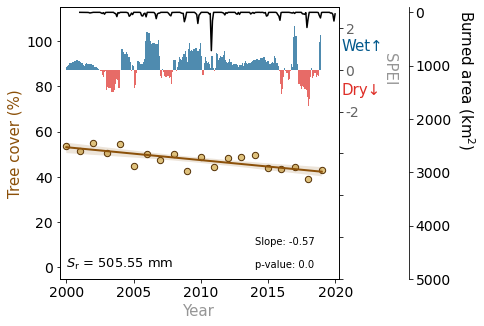

In [335]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

fig, ax = plt.subplots(1,1,figsize=(5,5))

ax.text(2000,0,str(r'$S_{\mathrm{r}}$ = '+str(round(float(Sr.median().values),2))+' mm'), fontsize = 13)

TC_MOD44B_mean = np.nanmean(TC_MOD44B, axis = (1,2))

ax2 = ax.twinx()
colormat=np.where(SPEI_PM.to_dataframe()['spei']>0, '#045a8d','#de2d26')
ax2.bar(np.linspace(2000,2018.9167,228), SPEI_PM, width = 0.083, alpha = 0.7, color = colormat, edgecolor = 'none')
ax2.set_ylim(-10,3);
ax2.set_yticklabels([' ',' ',' ',' ',-2,0,2], color = '#636363');
ax2.text(2020.5,0.90, 'Wet↑', fontsize = 15, rotation = 0, color = '#045a8d')
ax2.text(2020.5,-1.20, 'Dry↓', fontsize = 15, rotation = 0, color = '#de2d26')
ax.scatter(np.linspace(2000,2019,20), TC_MOD44B_mean, color='#dfc27d', s = 40, alpha = 1, edgecolor = '#543005')
sns.regplot(x=np.linspace(2000,2019,20), y=TC_MOD44B_mean, ci = 95, ax=ax, scatter = False, color = '#8c510a', line_kws={'lw': 2})
    
ax.set_ylim(-5,115)
ax.set_xlim(2000-0.5,2020+0.25)
ax.set_ylabel('Tree cover (%)', fontsize = 15, color = '#8c510a')
ax.set_xlabel('Year', fontsize = 15, color = '#969696')
ax.tick_params(axis='both', which='major', labelsize=14);
ax2.tick_params(axis='both', which='major', labelsize=14);
ax2.text(2023.5,-0.60, 'SPEI', fontsize = 15, rotation = 270, color = '#969696')

ax3 = ax.twinx()
p3, = ax3.plot(np.linspace(2001,2019.99,228), np.array(Fire_summarized).flatten(), color = 'black')
#ax3.axis["right"].label.set_color(p3.get_color())
ax3.spines['right'].set_position(('outward', 70))
#ax3.set_yticklabels([' ',0,1000,2000,' ',' ',' '], color = 'black', fontsize = '12');
ax3.set_ylim(ax.get_ylim()[::-1])
ax3.set_ylim(5000,-100)
ax3.text(2029,2500, r"Burned area (km$^2$)", fontsize = 15, rotation = 270, color = 'black')
ax3.tick_params(axis='both', which='major', labelsize=14);

y = np.linspace(2000,2019,20).reshape(-1,1)
X = TC_MOD44B_mean.reshape(-1,1)
reg = LinearRegression()
reg.fit(X, y)
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(np.linspace(2000,2019,20),TC_MOD44B_mean)

ax.text(2014,0,'p-value: '+str(round(est2.pvalues[1],2)))
#ax.text(2014,5,'R.sq: '+str(round(est2.rsquared,2)))
ax.text(2014,10,'Slope: '+str(round(slope,2)))

### SA_d

In [336]:
geometry = np.array([[-44.587890625, -4.701094589592666],
          [-44.587890625, -6.537847421087335],
          [-42.830078125, -6.537847421087335],
          [-42.830078125, -4.701094589592666]])

In [337]:
TC_MOD44B = xr.open_dataset('/home/chandra/data/MOD44B_Treecover/Tropic_250m/MOD44B.006_250m_aid0001.nc').Percent_Tree_Cover[:,::-1].sel(lat = slice(geometry[2,1],geometry[0,1]), 
                                                                                                                                         lon = slice(geometry[0,0],geometry[2,0]))
TC_MOD44B

<xarray.DataArray 'Percent_Tree_Cover' (time: 20, lat: 881, lon: 844)>
[14871280 values with dtype=float32]
Coordinates:
  * time     (time) object 2000-03-05 00:00:00 ... 2019-03-06 00:00:00
  * lat      (lat) float64 -6.536 -6.534 -6.532 -6.53 ... -4.707 -4.705 -4.703
  * lon      (lon) float64 -44.59 -44.58 -44.58 -44.58 ... -42.83 -42.83 -42.83
Attributes:
    grid_mapping:  crs
    valid_min:     0
    valid_max:     100
    long_name:     Percent_Tree_Cover

In [338]:
#TC_MOD44B = TC_MOD44B[:]

In [339]:
TC_MOD44B = TC_MOD44B.where(TC_MOD44B != 200)

In [340]:
TC_MOD44B = TC_MOD44B.where((TC_MOD44B > 20) & (TC_MOD44B < 65))

In [341]:
Landuse = xr.open_rasterio('/home/chandra/data/Paper2/Landuse_Globcover_250m_SA.tif')[0,::-1].sel(y = slice(geometry[2,1],geometry[0,1]), 
                                                                                          x = slice(geometry[0,0],geometry[2,0]))
#Landuse = Landuse[:-1]
for classes in [11,14,20,30,190,200,210,220]:
    Landuse = Landuse.where(Landuse != classes)
Landuse = Landuse[:-1,:]
Landuse

<xarray.DataArray (y: 881, x: 844)>
array([[130., 130., 130., ...,  nan,  nan,  nan],
       [130., 130., 130., ...,  nan,  nan,  nan],
       [130., 130.,  50., ..., 130.,  nan,  nan],
       ...,
       [ 40.,  nan, 130., ...,  40.,  40.,  40.],
       [ 40.,  nan,  nan, ...,  40.,  40.,  40.],
       [ 40.,  40., 130., ...,  40.,  40.,  40.]])
Coordinates:
    band     int64 1
  * y        (y) float64 -6.537 -6.535 -6.533 -6.531 ... -4.708 -4.706 -4.704
  * x        (x) float64 -44.59 -44.59 -44.58 -44.58 ... -42.84 -42.83 -42.83
Attributes:
    transform:      (0.0020833333331467, 0.0, -90.0013888888889, 0.0, -0.0020...
    crs:            +init=epsg:4326
    res:            (0.0020833333331467, 0.0020833333331467)
    is_tiled:       1
    nodatavals:     (nan,)
    scales:         (1.0,)
    offsets:        (0.0,)
    AREA_OR_POINT:  Area
    DataType:       Generic

In [342]:
TC_MOD44B = TC_MOD44B.where(Landuse.values > 0)

<ipython-input-342-6e84aafc7bbd>:1: RuntimeWarning: invalid value encountered in greater
  TC_MOD44B = TC_MOD44B.where(Landuse.values > 0)


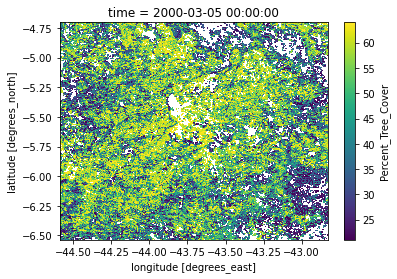

In [343]:
TC_MOD44B[0].plot()

In [344]:
Sr = xr.open_dataset('/home/chandra/data/Stable_unstable_paper/Sr_netcdf.nc').mle_gumbel_Layer[::-1].sel(lat = slice(geometry[2,1],geometry[0,1]), 
                                                                                            lon = slice(geometry[0,0],geometry[2,0]))
Sr

<xarray.DataArray 'mle_gumbel_Layer' (lat: 7, lon: 7)>
array([[607.7656 , 611.8852 , 630.66315, 638.6585 , 624.7254 , 545.15   ,
        605.13635],
       [586.00653, 613.50586, 621.5214 , 639.45807, 637.9782 , 580.3336 ,
        610.3034 ],
       [619.6982 , 630.3972 , 645.8741 , 676.0634 , 664.4887 , 667.1569 ,
        700.05255],
       [653.5266 , 645.4212 , 611.85754, 644.90295, 653.3512 , 671.77014,
        683.10876],
       [669.3069 , 743.8281 , 711.5906 , 743.2508 , 742.04694, 736.46765,
        736.05853],
       [674.018  , 728.53033, 715.11304, 743.3489 , 744.1434 , 732.0916 ,
        752.2693 ],
       [697.3366 , 745.92035, 776.6441 , 714.15686, 723.0452 , 712.44495,
        728.8491 ]], dtype=float32)
Coordinates:
  * lon      (lon) float64 -44.38 -44.12 -43.88 -43.62 -43.38 -43.12 -42.88
  * lat      (lat) float64 -6.375 -6.125 -5.875 -5.625 -5.375 -5.125 -4.875
Attributes:
    long_name:       mle_gumbel_Layer
    esri_pe_string:  GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1...
    units:           Degree

In [345]:
SPEI_PM = xr.open_dataset('/home/chandra/data/Stable_unstable_paper/spei12_PM.nc').spei.sel(lat = slice(geometry[2,1],geometry[0,1]), 
                                                                                            lon = slice(geometry[0,0],geometry[2,0]),
                                                                                            time = slice('2000','2018'))
SPEI_PM = SPEI_PM.mean(axis = (1,2))

In [346]:
Fire_summarized = []
for year in (range(2001,2020)):
    Fire = xr.open_mfdataset('/home/chandra/data/MCD64A1-Fire/FireCCI51_'+str(year)+'/'+str(year)+'*-ESACCI-L4_FIRE-BA-MODIS-fv5.1.1cds.nc').burned_area[:,::-1].sel(lat = slice(geometry[2,1],geometry[0,1]), 
                                                                                                lon = slice(geometry[0,0],geometry[2,0]))
    #Fire = np.max(Fire.sum(axis = (1,2)).values/(10**6))
    Fire = (Fire.sum(axis = (1,2)).values/(10**6))
    Fire_summarized.append(Fire.tolist())

<ipython-input-346-c5c0eabd1099>:3: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  Fire = xr.open_mfdataset('/home/chandra/data/MCD64A1-Fire/FireCCI51_'+str(year)+'/'+str(year)+'*-ESACCI-L4_FIRE-BA-MODIS-fv5.1.1cds.nc').burned_area[:,::-1].sel(lat = slice(geometry[2,1],geometry[0,1]),
/usr/lib/python3/dist-packages/xarray/backends/api.py:934: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdatas

<ipython-input-347-a6c7d898a090>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels([' ',' ',' ',' ',-2,0,2], color = '#636363');


Text(2014, 10, 'Slope: -0.67')

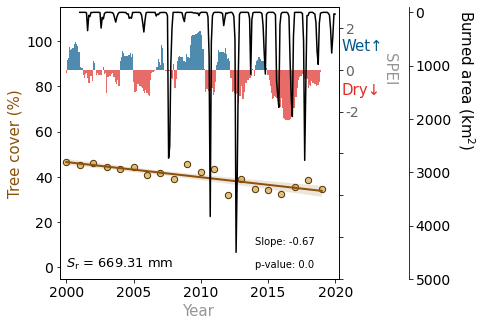

In [347]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

fig, ax = plt.subplots(1,1,figsize=(5,5))

ax.text(2000,0,str(r'$S_{\mathrm{r}}$ = '+str(round(float(Sr.median().values),2))+' mm'), fontsize = 13)

TC_MOD44B_mean = np.nanmean(TC_MOD44B, axis = (1,2))

ax2 = ax.twinx()
colormat=np.where(SPEI_PM.to_dataframe()['spei']>0, '#045a8d','#de2d26')
ax2.bar(np.linspace(2000,2018.9167,228), SPEI_PM, width = 0.083, alpha = 0.7, color = colormat, edgecolor = 'none')
ax2.set_ylim(-10,3);
ax2.set_yticklabels([' ',' ',' ',' ',-2,0,2], color = '#636363');
ax2.text(2020.5,0.90, 'Wet↑', fontsize = 15, rotation = 0, color = '#045a8d')
ax2.text(2020.5,-1.20, 'Dry↓', fontsize = 15, rotation = 0, color = '#de2d26')
ax.scatter(np.linspace(2000,2019,20), TC_MOD44B_mean, color='#dfc27d', s = 40, alpha = 1, edgecolor = '#543005')
sns.regplot(x=np.linspace(2000,2019,20), y=TC_MOD44B_mean, ci = 95, ax=ax, scatter = False, color = '#8c510a', line_kws={'lw': 2})
    
ax.set_ylim(-5,115)
ax.set_xlim(2000-0.5,2020+0.25)
ax.set_ylabel('Tree cover (%)', fontsize = 15, color = '#8c510a')
ax.set_xlabel('Year', fontsize = 15, color = '#969696')
ax.tick_params(axis='both', which='major', labelsize=14);
ax2.tick_params(axis='both', which='major', labelsize=14);
ax2.text(2023.5,-0.60, 'SPEI', fontsize = 15, rotation = 270, color = '#969696')

ax3 = ax.twinx()
p3, = ax3.plot(np.linspace(2001,2019.99,228), np.array(Fire_summarized).flatten(), color = 'black')
#ax3.axis["right"].label.set_color(p3.get_color())
ax3.spines['right'].set_position(('outward', 70))
#ax3.set_yticklabels([' ',0,1000,2000,' ',' ',' '], color = 'black', fontsize = '12');
ax3.set_ylim(ax.get_ylim()[::-1])
ax3.set_ylim(5000,-100)
ax3.text(2029,2500, r"Burned area (km$^2$)", fontsize = 15, rotation = 270, color = 'black')
ax3.tick_params(axis='both', which='major', labelsize=14);


y = np.linspace(2000,2019,20).reshape(-1,1)
X = TC_MOD44B_mean.reshape(-1,1)
reg = LinearRegression()
reg.fit(X, y)
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(np.linspace(2000,2019,20),TC_MOD44B_mean)

ax.text(2014,0,'p-value: '+str(round(est2.pvalues[1],2)))
#ax.text(2014,5,'R.sq: '+str(round(est2.rsquared,2)))
ax.text(2014,10,'Slope: '+str(round(slope,2)))

### SA_e

In [348]:
geometry = np.array([[-67.703125, -5.488978417551024],
          [-67.703125, -7.323077028275151],
          [-65.9453125, -7.323077028275151],
          [-65.9453125, -5.488978417551024]])

In [349]:
TC_MOD44B = xr.open_dataset('/home/chandra/data/MOD44B_Treecover/Tropic_250m/MOD44B.006_250m_aid0001.nc').Percent_Tree_Cover[:,::-1].sel(lat = slice(geometry[2,1],geometry[0,1]), 
                                                                                                                                         lon = slice(geometry[0,0],geometry[2,0]))
TC_MOD44B = TC_MOD44B[:,:,:]
TC_MOD44B

<xarray.DataArray 'Percent_Tree_Cover' (time: 20, lat: 880, lon: 844)>
[14854400 values with dtype=float32]
Coordinates:
  * time     (time) object 2000-03-05 00:00:00 ... 2019-03-06 00:00:00
  * lat      (lat) float64 -7.322 -7.32 -7.318 -7.316 ... -5.495 -5.493 -5.491
  * lon      (lon) float64 -67.7 -67.7 -67.7 -67.7 ... -65.95 -65.95 -65.95
Attributes:
    grid_mapping:  crs
    valid_min:     0
    valid_max:     100
    long_name:     Percent_Tree_Cover

In [350]:
#TC_MOD44B = TC_MOD44B[:]

In [351]:
TC_MOD44B = TC_MOD44B.where(TC_MOD44B != 200)

In [352]:
TC_MOD44B = TC_MOD44B.where((TC_MOD44B > 20))

In [353]:
Landuse = xr.open_rasterio('/home/chandra/data/Paper2/Landuse_Globcover_250m_SA.tif')[0,::-1].sel(y = slice(geometry[2,1],geometry[0,1]), 
                                                                                          x = slice(geometry[0,0],geometry[2,0]))
for classes in [11,14,20,30,190,200,210,220]:
    Landuse = Landuse.where(Landuse != classes)
Landuse = Landuse[:-1,:]
Landuse

<xarray.DataArray (y: 880, x: 844)>
array([[40., 40., 40., ..., 40., 40., 40.],
       [40., 40., 40., ..., 40., 40., 40.],
       [40., 40., 40., ..., 40., 40., 40.],
       ...,
       [40., 40., 40., ..., 40., 40., 40.],
       [40., 40., 40., ..., 40., 40., 40.],
       [40., 40., 40., ..., 40., 40., 40.]])
Coordinates:
    band     int64 1
  * y        (y) float64 -7.323 -7.32 -7.318 -7.316 ... -5.495 -5.493 -5.491
  * x        (x) float64 -67.7 -67.7 -67.7 -67.7 ... -65.95 -65.95 -65.95 -65.95
Attributes:
    transform:      (0.0020833333331467, 0.0, -90.0013888888889, 0.0, -0.0020...
    crs:            +init=epsg:4326
    res:            (0.0020833333331467, 0.0020833333331467)
    is_tiled:       1
    nodatavals:     (nan,)
    scales:         (1.0,)
    offsets:        (0.0,)
    AREA_OR_POINT:  Area
    DataType:       Generic

In [354]:
TC_MOD44B = TC_MOD44B.where(Landuse.values > 0)

<ipython-input-354-6e84aafc7bbd>:1: RuntimeWarning: invalid value encountered in greater
  TC_MOD44B = TC_MOD44B.where(Landuse.values > 0)


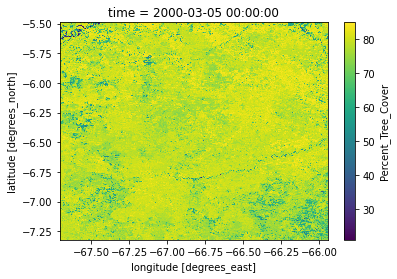

In [355]:
TC_MOD44B[0].plot()

In [356]:
Sr = xr.open_dataset('/home/chandra/data/Stable_unstable_paper/Sr_netcdf.nc').mle_gumbel_Layer[::-1].sel(lat = slice(geometry[2,1],geometry[0,1]), 
                                                                                            lon = slice(geometry[0,0],geometry[2,0]))
Sr

<xarray.DataArray 'mle_gumbel_Layer' (lat: 7, lon: 7)>
array([[301.71704, 298.64642, 315.53134, 318.1175 , 339.85663, 374.09137,
        385.81433],
       [293.1923 , 277.45728, 281.78363, 293.59955, 340.86557, 378.09833,
        375.69583],
       [303.2689 , 280.26874, 279.45035, 285.38266, 309.79367, 343.51468,
        352.68393],
       [268.63214, 262.77417, 245.00311, 258.21097, 254.1838 , 294.8802 ,
        322.7971 ],
       [250.5981 , 246.38298, 236.62695, 235.16655, 247.49089, 265.32993,
        286.1347 ],
       [233.95297, 217.16681, 211.18555, 204.42757, 213.21579, 241.95078,
        261.18088],
       [230.24509, 186.74675, 185.21602, 185.05101, 193.61646, 208.37207,
        233.4097 ]], dtype=float32)
Coordinates:
  * lon      (lon) float64 -67.62 -67.38 -67.12 -66.88 -66.62 -66.38 -66.12
  * lat      (lat) float64 -7.125 -6.875 -6.625 -6.375 -6.125 -5.875 -5.625
Attributes:
    long_name:       mle_gumbel_Layer
    esri_pe_string:  GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1...
    units:           Degree

In [357]:
SPEI_PM = xr.open_dataset('/home/chandra/data/Stable_unstable_paper/spei12_PM.nc').spei.sel(lat = slice(geometry[2,1],geometry[0,1]), 
                                                                                            lon = slice(geometry[0,0],geometry[2,0]),
                                                                                            time = slice('2000','2018'))
SPEI_PM = SPEI_PM.mean(axis = (1,2))

In [358]:
Fire_summarized = []
for year in (range(2001,2020)):
    Fire = xr.open_mfdataset('/home/chandra/data/MCD64A1-Fire/FireCCI51_'+str(year)+'/'+str(year)+'*-ESACCI-L4_FIRE-BA-MODIS-fv5.1.1cds.nc').burned_area[:,::-1].sel(lat = slice(geometry[2,1],geometry[0,1]), 
                                                                                                lon = slice(geometry[0,0],geometry[2,0]))
    #Fire = np.max(Fire.sum(axis = (1,2)).values/(10**6))
    Fire = (Fire.sum(axis = (1,2)).values/(10**6))
    Fire_summarized.append(Fire.tolist())

<ipython-input-358-c5c0eabd1099>:3: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  Fire = xr.open_mfdataset('/home/chandra/data/MCD64A1-Fire/FireCCI51_'+str(year)+'/'+str(year)+'*-ESACCI-L4_FIRE-BA-MODIS-fv5.1.1cds.nc').burned_area[:,::-1].sel(lat = slice(geometry[2,1],geometry[0,1]),
/usr/lib/python3/dist-packages/xarray/backends/api.py:934: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdatas

<ipython-input-359-286cda20127c>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels([' ',' ',' ',' ',-2,0,2], color = '#636363');


Text(2014, 10, 'Slope: 0.12')

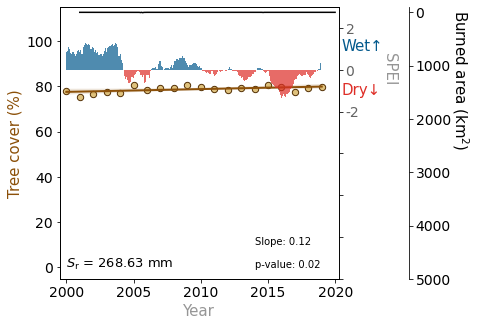

In [359]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

fig, ax = plt.subplots(1,1,figsize=(5,5))

ax.text(2000,0,str(r'$S_{\mathrm{r}}$ = '+str(round(float(Sr.median().values),2))+' mm'), fontsize = 13)

TC_MOD44B_mean = np.nanmean(TC_MOD44B, axis = (1,2))

ax2 = ax.twinx()
colormat=np.where(SPEI_PM.to_dataframe()['spei']>0, '#045a8d','#de2d26')
ax2.bar(np.linspace(2000,2018.9167,228), SPEI_PM, width = 0.083, alpha = 0.7, color = colormat, edgecolor = 'none')
ax2.set_ylim(-10,3);
ax2.set_yticklabels([' ',' ',' ',' ',-2,0,2], color = '#636363');
ax2.text(2020.5,0.90, 'Wet↑', fontsize = 15, rotation = 0, color = '#045a8d')
ax2.text(2020.5,-1.20, 'Dry↓', fontsize = 15, rotation = 0, color = '#de2d26')
ax.scatter(np.linspace(2000,2019,20), TC_MOD44B_mean, color='#dfc27d', s = 40, alpha = 1, edgecolor = '#543005')
sns.regplot(x=np.linspace(2000,2019,20), y=TC_MOD44B_mean, ci = 95, ax=ax, scatter = False, color = '#8c510a', line_kws={'lw': 2})
    
ax.set_ylim(-5,115)
ax.set_xlim(2000-0.5,2020+0.25)
ax.set_ylabel('Tree cover (%)', fontsize = 15, color = '#8c510a')
ax.set_xlabel('Year', fontsize = 15, color = '#969696')
ax.tick_params(axis='both', which='major', labelsize=14);
ax2.tick_params(axis='both', which='major', labelsize=14);
ax2.text(2023.5,-0.60, 'SPEI', fontsize = 15, rotation = 270, color = '#969696')

ax3 = ax.twinx()
#ax3.set_ylabel(r"Burned area (km$^2$)", fontsize = '14', rotation = 270)
p3, = ax3.plot(np.linspace(2001,2019.99,228), np.array(Fire_summarized).flatten(), color = 'black')
#ax3.axis["right"].label.set_color(p3.get_color())
ax3.spines['right'].set_position(('outward', 70))
#ax3.set_yticklabels([' ',0,1000,2000,' ',' ',' '], color = 'black', fontsize = '12');
ax3.set_ylim(ax.get_ylim()[::-1])
ax3.set_ylim(5000,-100)
ax3.text(2028.5,2500, r"Burned area (km$^2$)", fontsize = 15, rotation = 270, color = 'black')
ax3.tick_params(axis='both', which='major', labelsize=14);


y = np.linspace(2000,2019,20).reshape(-1,1)
X = TC_MOD44B_mean.reshape(-1,1)
reg = LinearRegression()
reg.fit(X, y)
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()

from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(np.linspace(2000,2019,20),TC_MOD44B_mean)

ax.text(2014,0,'p-value: '+str(round(est2.pvalues[1],2)))
#ax.text(2014,5,'R.sq: '+str(round(est2.rsquared,2)))
ax.text(2014,10,'Slope: '+str(round(slope,2)))

#### SA_f

In [360]:
geometry = np.array([[-56.62890625, -10.448757390049366],
          [-56.62890625, -12.258261112907766],
          [-54.87109375, -12.258261112907766],
          [-54.87109375, -10.448757390049366]]);

In [361]:
TC_MOD44B = xr.open_dataset('/home/chandra/data/MOD44B_Treecover/Tropic_250m/MOD44B.006_250m_aid0001.nc').Percent_Tree_Cover[:,::-1].sel(lat = slice(geometry[2,1],geometry[0,1]), 
                                                                                                                                         lon = slice(geometry[0,0],geometry[2,0]))
TC_MOD44B = TC_MOD44B[:,:,:]
TC_MOD44B

<xarray.DataArray 'Percent_Tree_Cover' (time: 20, lat: 869, lon: 844)>
[14668720 values with dtype=float32]
Coordinates:
  * time     (time) object 2000-03-05 00:00:00 ... 2019-03-06 00:00:00
  * lat      (lat) float64 -12.26 -12.26 -12.25 -12.25 ... -10.45 -10.45 -10.45
  * lon      (lon) float64 -56.63 -56.63 -56.62 -56.62 ... -54.88 -54.87 -54.87
Attributes:
    grid_mapping:  crs
    valid_min:     0
    valid_max:     100
    long_name:     Percent_Tree_Cover

In [362]:
TC_MOD44B = TC_MOD44B.where(TC_MOD44B != 200)

In [363]:
TC_MOD44B = TC_MOD44B.where((TC_MOD44B > 20))

In [364]:
Landuse = xr.open_rasterio('/home/chandra/data/Paper2/Landuse_Globcover_250m_SA.tif')[0,::-1].sel(y = slice(geometry[2,1],geometry[0,1]), 
                                                                                          x = slice(geometry[0,0],geometry[2,0]))
#Landuse = Landuse[:-1]
for classes in [11,14,20,30,190,200,210,220]:
    Landuse = Landuse.where(Landuse != classes)
Landuse = Landuse[:,:]
Landuse

<xarray.DataArray (y: 869, x: 844)>
array([[130., 110.,  nan, ...,  40.,  40.,  40.],
       [130., 110.,  40., ...,  40.,  40.,  40.],
       [130.,  nan, 110., ...,  40.,  40.,  40.],
       ...,
       [ 40.,  40.,  40., ...,  40.,  40.,  40.],
       [ 40.,  40.,  40., ...,  40.,  40.,  40.],
       [ 40.,  40.,  40., ...,  40.,  40.,  40.]])
Coordinates:
    band     int64 1
  * y        (y) float64 -12.26 -12.26 -12.25 -12.25 ... -10.45 -10.45 -10.45
  * x        (x) float64 -56.63 -56.63 -56.62 -56.62 ... -54.88 -54.87 -54.87
Attributes:
    transform:      (0.0020833333331467, 0.0, -90.0013888888889, 0.0, -0.0020...
    crs:            +init=epsg:4326
    res:            (0.0020833333331467, 0.0020833333331467)
    is_tiled:       1
    nodatavals:     (nan,)
    scales:         (1.0,)
    offsets:        (0.0,)
    AREA_OR_POINT:  Area
    DataType:       Generic

In [365]:
TC_MOD44B = TC_MOD44B.where(Landuse.values > 0)

<ipython-input-365-6e84aafc7bbd>:1: RuntimeWarning: invalid value encountered in greater
  TC_MOD44B = TC_MOD44B.where(Landuse.values > 0)


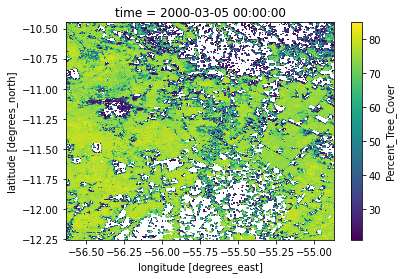

In [366]:
TC_MOD44B[0].plot()

In [367]:
Sr = xr.open_dataset('/home/chandra/data/Stable_unstable_paper/Sr_netcdf.nc').mle_gumbel_Layer[::-1].sel(lat = slice(geometry[2,1],geometry[0,1]), 
                                                                                            lon = slice(geometry[0,0],geometry[2,0]))
Sr

<xarray.DataArray 'mle_gumbel_Layer' (lat: 7, lon: 8)>
array([[612.37915, 645.32654, 536.25323, 520.5262 , 520.67   , 536.7354 ,
        626.0289 , 654.38824],
       [647.9086 , 663.43427, 616.7532 , 643.08496, 573.29865, 581.6061 ,
        653.653  , 667.15106],
       [646.46155, 651.45233, 632.1603 , 635.4128 , 588.25665, 581.5911 ,
        635.82745, 661.3966 ],
       [604.209  , 617.8617 , 665.55994, 697.30884, 691.2021 , 680.2288 ,
        675.75916, 699.4412 ],
       [600.6807 , 634.88043, 672.2105 , 666.26965, 658.9842 , 663.0575 ,
        683.0792 , 683.49817],
       [622.0157 , 631.3862 , 640.07043, 601.09515, 555.9144 , 596.475  ,
        578.1437 , 592.36115],
       [609.18976, 614.18524, 597.8406 , 600.8121 , 546.486  , 573.2999 ,
        561.4689 , 586.38403]], dtype=float32)
Coordinates:
  * lon      (lon) float64 -56.62 -56.38 -56.12 -55.88 ... -55.38 -55.12 -54.88
  * lat      (lat) float64 -12.12 -11.88 -11.62 -11.38 -11.12 -10.88 -10.62
Attributes:
    long_name:       mle_gumbel_Layer
    esri_pe_string:  GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1...
    units:           Degree

In [368]:
SPEI_PM = xr.open_dataset('/home/chandra/data/Stable_unstable_paper/spei12_PM.nc').spei.sel(lat = slice(geometry[2,1],geometry[0,1]), 
                                                                                            lon = slice(geometry[0,0],geometry[2,0]),
                                                                                            time = slice('2000','2018'))
SPEI_PM = SPEI_PM.mean(axis = (1,2))

In [369]:
Fire_summarized = []
for year in (range(2001,2020)):
    Fire = xr.open_mfdataset('/home/chandra/data/MCD64A1-Fire/FireCCI51_'+str(year)+'/'+str(year)+'*-ESACCI-L4_FIRE-BA-MODIS-fv5.1.1cds.nc').burned_area[:,::-1].sel(lat = slice(geometry[2,1],geometry[0,1]), 
                                                                                                lon = slice(geometry[0,0],geometry[2,0]));
    #Fire = np.max(Fire.sum(axis = (1,2)).values/(10**6))
    Fire = (Fire.sum(axis = (1,2)).values/(10**6))
    Fire_summarized.append(Fire.tolist())

<ipython-input-369-6ddf96af6c3d>:3: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  Fire = xr.open_mfdataset('/home/chandra/data/MCD64A1-Fire/FireCCI51_'+str(year)+'/'+str(year)+'*-ESACCI-L4_FIRE-BA-MODIS-fv5.1.1cds.nc').burned_area[:,::-1].sel(lat = slice(geometry[2,1],geometry[0,1]),
/usr/lib/python3/dist-packages/xarray/backends/api.py:934: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdatas

<ipython-input-370-3292e70c1605>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels([' ',' ',' ',' ',-2,0,2], color = '#636363');


Text(2014, 10, 'Slope: -0.56')

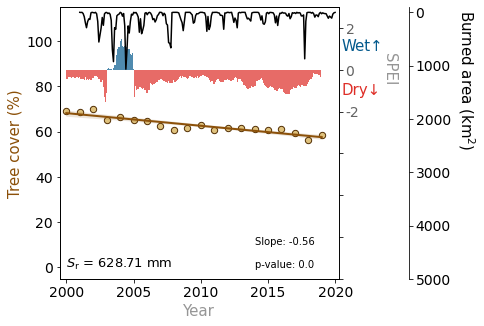

In [370]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

fig, ax = plt.subplots(1,1,figsize=(5,5))

ax.text(2000,0,str(r'$S_{\mathrm{r}}$ = '+str(round(float(Sr.median().values),2))+' mm'), fontsize = 13)

TC_MOD44B_mean = np.nanmean(TC_MOD44B, axis = (1,2))

ax2 = ax.twinx()
colormat=np.where(SPEI_PM.to_dataframe()['spei']>0, '#045a8d','#de2d26')
ax2.bar(np.linspace(2000,2018.9167,228), SPEI_PM, width = 0.083, alpha = 0.7, color = colormat, edgecolor = 'none')
ax2.set_ylim(-10,3);
ax2.set_yticklabels([' ',' ',' ',' ',-2,0,2], color = '#636363');
ax2.text(2020.5,0.90, 'Wet↑', fontsize = 15, rotation = 0, color = '#045a8d')
ax2.text(2020.5,-1.20, 'Dry↓', fontsize = 15, rotation = 0, color = '#de2d26')
ax.scatter(np.linspace(2000,2019,20), TC_MOD44B_mean, color='#dfc27d', s = 40, alpha = 1, edgecolor = '#543005')
sns.regplot(x=np.linspace(2000,2019,20), y=TC_MOD44B_mean, ci = 95, ax=ax, scatter = False, color = '#8c510a', line_kws={'lw': 2})
    
ax.set_ylim(-5,115)
ax.set_xlim(2000-0.5,2020+0.25)
ax.set_ylabel('Tree cover (%)', fontsize = 15, color = '#8c510a')
ax.set_xlabel('Year', fontsize = 15, color = '#969696')
ax.tick_params(axis='both', which='major', labelsize=14);
ax2.tick_params(axis='both', which='major', labelsize=14);
ax2.text(2023.5,-0.60, 'SPEI', fontsize = 15, rotation = 270, color = '#969696')

ax3 = ax.twinx()
p3, = ax3.plot(np.linspace(2001,2019.99,228), np.array(Fire_summarized).flatten(), color = 'black')
#ax3.axis["right"].label.set_color(p3.get_color())
ax3.spines['right'].set_position(('outward', 70))
#ax3.set_yticklabels([' ',0,1000,2000,' ',' ',' '], color = 'black', fontsize = '12');
ax3.set_ylim(ax.get_ylim()[::-1])
ax3.set_ylim(5000,-100)
ax3.text(2029,2500, r"Burned area (km$^2$)", fontsize = 15, rotation = 270, color = 'black')
ax3.tick_params(axis='both', which='major', labelsize=14);

y = np.linspace(2000,2019,20).reshape(-1,1)
X = TC_MOD44B_mean.reshape(-1,1)
reg = LinearRegression()
reg.fit(X, y)
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()

from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(np.linspace(2000,2019,20),TC_MOD44B_mean)

ax.text(2014,0,'p-value: '+str(round(est2.pvalues[1],2)))
#ax.text(2014,5,'R.sq: '+str(round(est2.rsquared,2)))
ax.text(2014,10,'Slope: '+str(round(slope,2)))

#### SA_g

In [371]:
geometry = np.array([[-51.794921875, -26.553006267681724],
          [-51.794921875, -28.19197170634869],
          [-50.037109375, -28.19197170634869],
          [-50.037109375, -26.553006267681724]])

In [372]:
TC_MOD44B = xr.open_dataset('/home/chandra/data/MOD44B_Treecover/Tropic_250m/MOD44B.006_250m_aid0001.nc').Percent_Tree_Cover[:,::-1].sel(lat = slice(geometry[2,1],geometry[0,1]), 
                                                                                                                                         lon = slice(geometry[0,0],geometry[2,0]))
TC_MOD44B = TC_MOD44B[:,:,:]
TC_MOD44B

<xarray.DataArray 'Percent_Tree_Cover' (time: 20, lat: 787, lon: 844)>
[13284560 values with dtype=float32]
Coordinates:
  * time     (time) object 2000-03-05 00:00:00 ... 2019-03-06 00:00:00
  * lat      (lat) float64 -28.19 -28.19 -28.19 -28.18 ... -26.56 -26.56 -26.55
  * lon      (lon) float64 -51.79 -51.79 -51.79 -51.79 ... -50.04 -50.04 -50.04
Attributes:
    grid_mapping:  crs
    valid_min:     0
    valid_max:     100
    long_name:     Percent_Tree_Cover

In [373]:
#TC_MOD44B = TC_MOD44B[:]

In [374]:
TC_MOD44B = TC_MOD44B.where(TC_MOD44B != 200)

In [375]:
TC_MOD44B = TC_MOD44B.where((TC_MOD44B > 20) & (TC_MOD44B < 65))

In [376]:
Landuse = xr.open_rasterio('/home/chandra/data/Paper2/Landuse_Globcover_250m_SA.tif')[0,::-1].sel(y = slice(geometry[2,1],geometry[0,1]), 
                                                                                          x = slice(geometry[0,0],geometry[2,0]))
#Landuse = Landuse[:-1]
for classes in [11,14,20,30,190,200,210,220]:
    Landuse = Landuse.where(Landuse != classes)
Landuse

<xarray.DataArray (y: 787, x: 844)>
array([[ nan,  nan,  nan, ...,  40., 130., 130.],
       [ nan,  nan,  nan, ...,  40.,  40.,  40.],
       [ nan,  nan,  nan, ...,  nan, 130., 130.],
       ...,
       [ nan,  nan,  nan, ...,  40.,  40.,  40.],
       [ 40.,  40.,  nan, ...,  nan,  40.,  40.],
       [ 40.,  40.,  nan, ...,  40.,  40.,  40.]])
Coordinates:
    band     int64 1
  * y        (y) float64 -28.19 -28.19 -28.19 -28.19 ... -26.56 -26.56 -26.55
  * x        (x) float64 -51.79 -51.79 -51.79 -51.79 ... -50.04 -50.04 -50.04
Attributes:
    transform:      (0.0020833333331467, 0.0, -90.0013888888889, 0.0, -0.0020...
    crs:            +init=epsg:4326
    res:            (0.0020833333331467, 0.0020833333331467)
    is_tiled:       1
    nodatavals:     (nan,)
    scales:         (1.0,)
    offsets:        (0.0,)
    AREA_OR_POINT:  Area
    DataType:       Generic

In [377]:
TC_MOD44B = TC_MOD44B.where(Landuse.values > 0)

<ipython-input-377-6e84aafc7bbd>:1: RuntimeWarning: invalid value encountered in greater
  TC_MOD44B = TC_MOD44B.where(Landuse.values > 0)


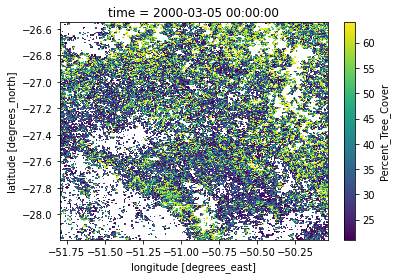

In [378]:
TC_MOD44B[0].plot()

In [379]:
Sr = xr.open_dataset('/home/chandra/data/Stable_unstable_paper/Sr_netcdf.nc').mle_gumbel_Layer[::-1].sel(lat = slice(geometry[2,1],geometry[0,1]), 
                                                                                            lon = slice(geometry[0,0],geometry[2,0]))
Sr

<xarray.DataArray 'mle_gumbel_Layer' (lat: 7, lon: 7)>
array([[174.11327 , 177.73898 , 161.44531 , 150.20358 , 147.71144 ,
        142.71695 , 135.81978 ],
       [185.16496 , 185.47565 , 176.79959 , 166.10315 , 144.67987 ,
        151.41835 , 123.52521 ],
       [184.59692 , 169.23923 , 177.08621 , 155.54845 , 146.28723 ,
        138.78178 , 116.676186],
       [206.06323 , 171.75967 , 157.58676 , 141.33    , 123.09804 ,
        127.2344  , 129.82663 ],
       [142.72908 , 143.63557 , 138.3563  , 139.15463 , 117.63181 ,
        124.22485 , 132.02423 ],
       [134.48114 , 126.53451 , 126.42674 , 126.54428 , 114.8725  ,
        122.20556 , 112.27046 ],
       [130.47269 , 130.1236  , 123.75672 , 146.17465 , 136.82951 ,
        126.36773 , 120.6155  ]], dtype=float32)
Coordinates:
  * lon      (lon) float64 -51.62 -51.38 -51.12 -50.88 -50.62 -50.38 -50.12
  * lat      (lat) float64 -28.12 -27.88 -27.62 -27.38 -27.12 -26.88 -26.62
Attributes:
    long_name:       mle_gumbel_Layer
    esri_pe_string:  GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1...
    units:           Degree

In [380]:
SPEI_PM = xr.open_dataset('/home/chandra/data/Stable_unstable_paper/spei12_PM.nc').spei.sel(lat = slice(geometry[2,1],geometry[0,1]), 
                                                                                            lon = slice(geometry[0,0],geometry[2,0]),
                                                                                            time = slice('2000','2018'))
SPEI_PM = SPEI_PM.mean(axis = (1,2))

In [381]:
Fire_summarized = []
for year in (range(2001,2020)):
    Fire = xr.open_mfdataset('/home/chandra/data/MCD64A1-Fire/FireCCI51_'+str(year)+'/'+str(year)+'*-ESACCI-L4_FIRE-BA-MODIS-fv5.1.1cds.nc').burned_area[:,::-1].sel(lat = slice(geometry[2,1],geometry[0,1]), 
                                                                                                lon = slice(geometry[0,0],geometry[2,0]))
    #Fire = np.max(Fire.sum(axis = (1,2)).values/(10**6))
    Fire = (Fire.sum(axis = (1,2)).values/(10**6))
    Fire_summarized.append(Fire.tolist())

<ipython-input-381-c5c0eabd1099>:3: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  Fire = xr.open_mfdataset('/home/chandra/data/MCD64A1-Fire/FireCCI51_'+str(year)+'/'+str(year)+'*-ESACCI-L4_FIRE-BA-MODIS-fv5.1.1cds.nc').burned_area[:,::-1].sel(lat = slice(geometry[2,1],geometry[0,1]),
/usr/lib/python3/dist-packages/xarray/backends/api.py:934: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdatas

<ipython-input-382-3292e70c1605>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels([' ',' ',' ',' ',-2,0,2], color = '#636363');


Text(2014, 10, 'Slope: 0.16')

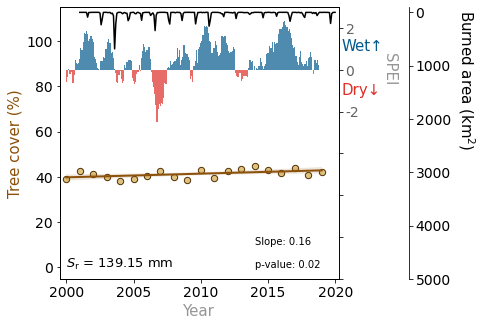

In [382]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

fig, ax = plt.subplots(1,1,figsize=(5,5))

ax.text(2000,0,str(r'$S_{\mathrm{r}}$ = '+str(round(float(Sr.median().values),2))+' mm'), fontsize = 13)

TC_MOD44B_mean = np.nanmean(TC_MOD44B, axis = (1,2))

ax2 = ax.twinx()
colormat=np.where(SPEI_PM.to_dataframe()['spei']>0, '#045a8d','#de2d26')
ax2.bar(np.linspace(2000,2018.9167,228), SPEI_PM, width = 0.083, alpha = 0.7, color = colormat, edgecolor = 'none')
ax2.set_ylim(-10,3);
ax2.set_yticklabels([' ',' ',' ',' ',-2,0,2], color = '#636363');
ax2.text(2020.5,0.90, 'Wet↑', fontsize = 15, rotation = 0, color = '#045a8d')
ax2.text(2020.5,-1.20, 'Dry↓', fontsize = 15, rotation = 0, color = '#de2d26')
ax.scatter(np.linspace(2000,2019,20), TC_MOD44B_mean, color='#dfc27d', s = 40, alpha = 1, edgecolor = '#543005')
sns.regplot(x=np.linspace(2000,2019,20), y=TC_MOD44B_mean, ci = 95, ax=ax, scatter = False, color = '#8c510a', line_kws={'lw': 2})
    
ax.set_ylim(-5,115)
ax.set_xlim(2000-0.5,2020+0.25)
ax.set_ylabel('Tree cover (%)', fontsize = 15, color = '#8c510a')
ax.set_xlabel('Year', fontsize = 15, color = '#969696')
ax.tick_params(axis='both', which='major', labelsize=14);
ax2.tick_params(axis='both', which='major', labelsize=14);
ax2.text(2023.5,-0.60, 'SPEI', fontsize = 15, rotation = 270, color = '#969696')

ax3 = ax.twinx()
p3, = ax3.plot(np.linspace(2001,2019.99,228), np.array(Fire_summarized).flatten(), color = 'black')
#ax3.axis["right"].label.set_color(p3.get_color())
ax3.spines['right'].set_position(('outward', 70))
#ax3.set_yticklabels([' ',0,1000,2000,' ',' ',' '], color = 'black', fontsize = '12');
ax3.set_ylim(ax.get_ylim()[::-1])
ax3.set_ylim(5000,-100)
ax3.text(2029,2500, r"Burned area (km$^2$)", fontsize = 15, rotation = 270, color = 'black')
ax3.tick_params(axis='both', which='major', labelsize=14);

y = np.linspace(2000,2019,20).reshape(-1,1)
X = TC_MOD44B_mean.reshape(-1,1)
reg = LinearRegression()
reg.fit(X, y)
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()

from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(np.linspace(2000,2019,20),TC_MOD44B_mean)

ax.text(2014,0,'p-value: '+str(round(est2.pvalues[1],2)))
#ax.text(2014,5,'R.sq: '+str(round(est2.rsquared,2)))
ax.text(2014,10,'Slope: '+str(round(slope,2)))

## For Africa

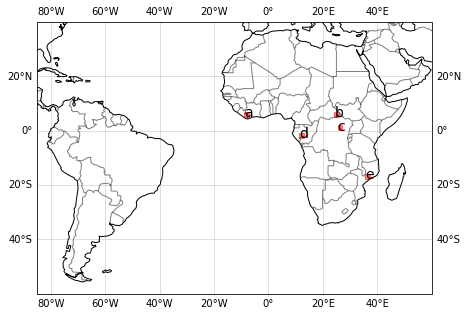

In [16]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1,figsize=(15,5))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
g0 = ax.gridlines(draw_labels=True, alpha =0.5, zorder = -1)

#ax.fill(geometry)
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=.5)
ax.set_xlim(-85,60)
ax.set_ylim(-60, 40)

geometry = np.array([[-8.992187500000002, 6.791334943007192],
          [-8.992187500000002, 4.955401068339922],
          [-7.234375000000002, 4.955401068339922],
          [-7.234375000000002, 6.791334943007192]])
x = geometry[:,0]        
y = geometry[:,1]
ax.text(geometry[0,0], geometry[1,1], 'a', fontsize = '14', color = 'black')
ax.fill(x, y, c = 'red', alpha = 0.5)

geometry = np.array([[24.230468749999996, 6.7913349430072305],
          [24.230468749999996, 4.955401068339947],
          [25.988281249999996, 4.955401068339947],
          [25.988281249999996, 6.7913349430072305]]);
x = geometry[:,0]        
y = geometry[:,1]
ax.text(geometry[0,0], geometry[1,1], 'b', fontsize = '14', color = 'black')
ax.fill(x, y, c = 'red', alpha = 0.5)

geometry = np.array([[25.460937499999996, 1.9729192867499628],
          [25.460937499999996, 0.12760605230131244],
          [27.218749999999996, 0.12760605230131244],
          [27.218749999999996, 1.9729192867499628]])
x = geometry[:,0]        
y = geometry[:,1]
ax.text(geometry[0,0], geometry[1,1], 'c', fontsize = '14', color = 'black')
ax.fill(x, y, c = 'red', alpha = 0.5)

geometry = np.array([[11.398437499999998, -0.8391607143780236],
          [11.398437499999998, -2.6839117630068805],
          [13.156249999999998, -2.6839117630068805],
          [13.156249999999998, -0.8391607143780236]])
x = geometry[:,0]        
y = geometry[:,1]
ax.text(geometry[0,0], geometry[1,1], 'd', fontsize = '14', color = 'black')
ax.fill(x, y, c = 'red', alpha = 0.5)

geometry = np.array([[35.568359375, -15.838604975444477],
          [35.568359375, -17.606170817135485],
          [37.326171875, -17.606170817135485],
          [37.326171875, -15.838604975444477]])
x = geometry[:,0]        
y = geometry[:,1]
ax.text(geometry[0,0], geometry[1,1], 'e', fontsize = '14', color = 'black')
ax.fill(x, y, c = 'red', alpha = 0.5)
"""
geometry = np.array([[-56.62890625, -10.448757390049366],
          [-56.62890625, -12.258261112907766],
          [-54.87109375, -12.258261112907766],
          [-54.87109375, -10.448757390049366]])
x = geometry[:,0]        
y = geometry[:,1]
ax.text(geometry[0,0], geometry[1,1], 'f', fontsize = '14', color = 'black')
ax.fill(x, y, c = 'red', alpha = 0.5)

geometry = np.array([[-51.794921875, -26.553006267681724],
          [-51.794921875, -28.19197170634869],
          [-50.037109375, -28.19197170634869],
          [-50.037109375, -26.553006267681724]])
x = geometry[:,0]        
y = geometry[:,1]
ax.text(geometry[0,0], geometry[1,1], 'g', fontsize = '14', color = 'black')
ax.fill(x, y, c = 'red', alpha = 0.5)


geometry = np.array([[24.52749780572593, 6.412965178130758],
          [24.52749780572593, 4.532015585894342],
          [27.38394311822593, 4.532015585894342],
          [27.38394311822593, 6.412965178130758]])
x = geometry[:,0]        
y = geometry[:,1]
ax.text(geometry[0,0], geometry[1,1], 'h', fontsize = '14', color = 'black')
ax.fill(x, y, c = 'red', alpha = 0.5)
"""
plt.show()

#### AF_a

In [469]:
geometry = np.array([[-8.992187500000002, 6.791334943007192],
          [-8.992187500000002, 4.955401068339922],
          [-7.234375000000002, 4.955401068339922],
          [-7.234375000000002, 6.791334943007192]])

In [474]:
TC_MOD44B = xr.open_dataset('/home/chandra/data/MOD44B_Treecover/Tropic_250m/MOD44B.006_250m_aid0001.nc').Percent_Tree_Cover[:,::-1].sel(lat = slice(geometry[2,1],geometry[0,1]), 
                                                                                                                                         lon = slice(geometry[0,0],geometry[2,0]))
TC_MOD44B = TC_MOD44B[:,:,:]
TC_MOD44B

<xarray.DataArray 'Percent_Tree_Cover' (time: 20, lat: 881, lon: 843)>
[14853660 values with dtype=float32]
Coordinates:
  * time     (time) object 2000-03-05 00:00:00 ... 2019-03-06 00:00:00
  * lat      (lat) float64 4.957 4.959 4.961 4.964 ... 6.784 6.786 6.789 6.791
  * lon      (lon) float64 -8.991 -8.989 -8.986 -8.984 ... -7.241 -7.239 -7.236
Attributes:
    grid_mapping:  crs
    valid_min:     0
    valid_max:     100
    long_name:     Percent_Tree_Cover

In [475]:
#TC_MOD44B = TC_MOD44B[:]

In [476]:
TC_MOD44B = TC_MOD44B.where(TC_MOD44B != 200)

In [477]:
TC_MOD44B = TC_MOD44B.where((TC_MOD44B > 20) & (TC_MOD44B < 65))

In [478]:
Landuse = xr.open_rasterio('/home/chandra/data/Paper2/Landuse_Globcover_250m_AF.tif')[0,::-1].sel(y = slice(geometry[2,1],geometry[0,1]), 
                                                                                          x = slice(geometry[0,0],geometry[2,0]))
for classes in [11,14,20,30,190,200,210,220]:
    Landuse = Landuse.where(Landuse != classes)
Landuse = Landuse[:,:-1]
Landuse

<xarray.DataArray (y: 881, x: 843)>
array([[nan, nan, nan, ..., 40., 40., 40.],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., 40., nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    band     int64 1
  * y        (y) float64 4.957 4.959 4.961 4.963 ... 6.784 6.786 6.788 6.79
  * x        (x) float64 -8.992 -8.99 -8.988 -8.986 ... -7.242 -7.24 -7.238
Attributes:
    transform:      (0.0020833333331467, 0.0, -20.001388888888897, 0.0, -0.00...
    crs:            +init=epsg:4326
    res:            (0.0020833333331467, 0.0020833333331467)
    is_tiled:       1
    nodatavals:     (nan,)
    scales:         (1.0,)
    offsets:        (0.0,)
    AREA_OR_POINT:  Area
    DataType:       Generic

In [479]:
TC_MOD44B = TC_MOD44B.where(Landuse.values > 0)

<ipython-input-479-6e84aafc7bbd>:1: RuntimeWarning: invalid value encountered in greater
  TC_MOD44B = TC_MOD44B.where(Landuse.values > 0)


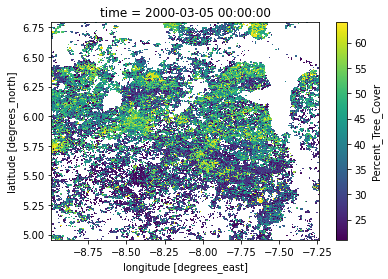

In [480]:
TC_MOD44B[0].plot()

In [481]:
Sr = xr.open_dataset('/home/chandra/data/Stable_unstable_paper/Sr_netcdf.nc').mle_gumbel_Layer[::-1].sel(lat = slice(geometry[2,1],geometry[0,1]), 
                                                                                            lon = slice(geometry[0,0],geometry[2,0]))
Sr

<xarray.DataArray 'mle_gumbel_Layer' (lat: 7, lon: 7)>
array([[187.22374, 186.63235, 195.20717, 215.64645, 219.15445, 210.7839 ,
        228.45311],
       [188.29637, 192.91534, 207.55771, 230.56015, 234.19986, 231.09326,
        233.19675],
       [237.46649, 236.60703, 237.52328, 278.2011 , 279.0202 , 293.98148,
        281.25162],
       [300.1787 , 299.8846 , 316.186  , 337.3692 , 345.52924, 345.4424 ,
        344.63956],
       [339.63843, 359.3209 , 373.93292, 376.34454, 368.66855, 340.69626,
        337.9033 ],
       [367.82083, 378.87762, 377.27487, 369.77295, 364.70868, 350.7474 ,
        361.84555],
       [373.1433 , 383.59552, 400.78854, 386.7883 , 390.687  , 390.59888,
        384.13754]], dtype=float32)
Coordinates:
  * lon      (lon) float64 -8.875 -8.625 -8.375 -8.125 -7.875 -7.625 -7.375
  * lat      (lat) float64 5.125 5.375 5.625 5.875 6.125 6.375 6.625
Attributes:
    long_name:       mle_gumbel_Layer
    esri_pe_string:  GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1...
    units:           Degree

In [482]:
SPEI_PM = xr.open_dataset('/home/chandra/data/Stable_unstable_paper/spei12_PM.nc').spei.sel(lat = slice(geometry[2,1],geometry[0,1]), 
                                                                                            lon = slice(geometry[0,0],geometry[2,0]),
                                                                                            time = slice('2000','2018'))
SPEI_PM = SPEI_PM.mean(axis = (1,2))

In [483]:
Fire_summarized = []
for year in (range(2001,2020)):
    Fire = xr.open_mfdataset('/home/chandra/data/MCD64A1-Fire/FireCCI51_'+str(year)+'/'+str(year)+'*-ESACCI-L4_FIRE-BA-MODIS-fv5.1.1cds.nc').burned_area[:,::-1].sel(lat = slice(geometry[2,1],geometry[0,1]), 
                                                                                                lon = slice(geometry[0,0],geometry[2,0]))
    #Fire = np.max(Fire.sum(axis = (1,2)).values/(10**6))
    Fire = (Fire.sum(axis = (1,2)).values/(10**6))
    Fire_summarized.append(Fire.tolist())

<ipython-input-483-c5c0eabd1099>:3: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  Fire = xr.open_mfdataset('/home/chandra/data/MCD64A1-Fire/FireCCI51_'+str(year)+'/'+str(year)+'*-ESACCI-L4_FIRE-BA-MODIS-fv5.1.1cds.nc').burned_area[:,::-1].sel(lat = slice(geometry[2,1],geometry[0,1]),
/usr/lib/python3/dist-packages/xarray/backends/api.py:934: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdatas

<ipython-input-484-286cda20127c>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels([' ',' ',' ',' ',-2,0,2], color = '#636363');


Text(2014, 10, 'Slope: 0.2')

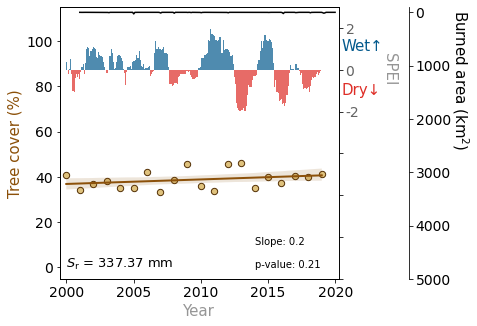

In [484]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

fig, ax = plt.subplots(1,1,figsize=(5,5))

ax.text(2000,0,str(r'$S_{\mathrm{r}}$ = '+str(round(float(Sr.median().values),2))+' mm'), fontsize = 13)

TC_MOD44B_mean = np.nanmean(TC_MOD44B, axis = (1,2))

ax2 = ax.twinx()
colormat=np.where(SPEI_PM.to_dataframe()['spei']>0, '#045a8d','#de2d26')
ax2.bar(np.linspace(2000,2018.9167,228), SPEI_PM, width = 0.083, alpha = 0.7, color = colormat, edgecolor = 'none')
ax2.set_ylim(-10,3);
ax2.set_yticklabels([' ',' ',' ',' ',-2,0,2], color = '#636363');
ax2.text(2020.5,0.90, 'Wet↑', fontsize = 15, rotation = 0, color = '#045a8d')
ax2.text(2020.5,-1.20, 'Dry↓', fontsize = 15, rotation = 0, color = '#de2d26')
ax.scatter(np.linspace(2000,2019,20), TC_MOD44B_mean, color='#dfc27d', s = 40, alpha = 1, edgecolor = '#543005')
sns.regplot(x=np.linspace(2000,2019,20), y=TC_MOD44B_mean, ci = 95, ax=ax, scatter = False, color = '#8c510a', line_kws={'lw': 2})
    
ax.set_ylim(-5,115)
ax.set_xlim(2000-0.5,2020+0.25)
ax.set_ylabel('Tree cover (%)', fontsize = 15, color = '#8c510a')
ax.set_xlabel('Year', fontsize = 15, color = '#969696')
ax.tick_params(axis='both', which='major', labelsize=14);
ax2.tick_params(axis='both', which='major', labelsize=14);
ax2.text(2023.5,-0.60, 'SPEI', fontsize = 15, rotation = 270, color = '#969696')

ax3 = ax.twinx()
#ax3.set_ylabel(r"Burned area (km$^2$)", fontsize = '14', rotation = 270)
p3, = ax3.plot(np.linspace(2001,2019.99,228), np.array(Fire_summarized).flatten(), color = 'black')
#ax3.axis["right"].label.set_color(p3.get_color())
ax3.spines['right'].set_position(('outward', 70))
#ax3.set_yticklabels([' ',0,1000,2000,' ',' ',' '], color = 'black', fontsize = '12');
ax3.set_ylim(ax.get_ylim()[::-1])
ax3.set_ylim(5000,-100)
ax3.text(2028.5,2500, r"Burned area (km$^2$)", fontsize = 15, rotation = 270, color = 'black')
ax3.tick_params(axis='both', which='major', labelsize=14);


y = np.linspace(2000,2019,20).reshape(-1,1)
X = TC_MOD44B_mean.reshape(-1,1)
reg = LinearRegression()
reg.fit(X, y)
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()

from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(np.linspace(2000,2019,20),TC_MOD44B_mean)

ax.text(2014,0,'p-value: '+str(round(est2.pvalues[1],2)))
#ax.text(2014,5,'R.sq: '+str(round(est2.rsquared,2)))
ax.text(2014,10,'Slope: '+str(round(slope,2)))

#### AF_b

In [17]:
geometry = np.array([[24.230468749999996, 6.7913349430072305],
          [24.230468749999996, 4.955401068339947],
          [25.988281249999996, 4.955401068339947],
          [25.988281249999996, 6.7913349430072305]]);

In [18]:
TC_MOD44B = xr.open_dataset('/home/chandra/data/MOD44B_Treecover/Tropic_250m/MOD44B.006_250m_aid0001.nc').Percent_Tree_Cover[:,::-1].sel(lat = slice(geometry[2,1],geometry[0,1]), 
                                                                                                                                         lon = slice(geometry[0,0],geometry[2,0]))
TC_MOD44B = TC_MOD44B[:,:,:]
TC_MOD44B

<xarray.DataArray 'Percent_Tree_Cover' (time: 20, lat: 881, lon: 843)>
[14853660 values with dtype=float32]
Coordinates:
  * time     (time) object 2000-03-05 00:00:00 ... 2019-03-06 00:00:00
  * lat      (lat) float64 4.957 4.959 4.961 4.964 ... 6.784 6.786 6.789 6.791
  * lon      (lon) float64 24.23 24.23 24.24 24.24 ... 25.98 25.98 25.98 25.99
Attributes:
    grid_mapping:  crs
    valid_min:     0
    valid_max:     100
    long_name:     Percent_Tree_Cover

In [19]:
TC_MOD44B = TC_MOD44B.where(TC_MOD44B != 200)

In [20]:
TC_MOD44B = TC_MOD44B.where((TC_MOD44B > 20) & (TC_MOD44B < 65))

In [21]:
Landuse = xr.open_rasterio('/home/chandra/data/Paper2/Landuse_Globcover_250m_AF.tif')[0,::-1].sel(y = slice(geometry[2,1],geometry[0,1]), 
                                                                                          x = slice(geometry[0,0],geometry[2,0]))
#Landuse = Landuse[:-1]
for classes in [11,14,20,30,190,200,210,220]:
    Landuse = Landuse.where(Landuse != classes)
Landuse = Landuse[:,:-1]
Landuse

<xarray.DataArray (y: 881, x: 843)>
array([[110., 120.,  nan, ...,  60., 130.,  40.],
       [ nan, 110., 110., ...,  60., 130., 130.],
       [ 40.,  40.,  40., ...,  60.,  60., 130.],
       ...,
       [130., 130., 130., ..., 130.,  60., 130.],
       [ 60., 130., 130., ..., 130., 130., 130.],
       [ 60., 130., 130., ..., 130., 130., 130.]])
Coordinates:
    band     int64 1
  * y        (y) float64 4.957 4.959 4.961 4.963 ... 6.784 6.786 6.788 6.79
  * x        (x) float64 24.23 24.23 24.24 24.24 ... 25.98 25.98 25.98 25.99
Attributes:
    transform:      (0.0020833333331467, 0.0, -20.001388888888897, 0.0, -0.00...
    crs:            +init=epsg:4326
    res:            (0.0020833333331467, 0.0020833333331467)
    is_tiled:       1
    nodatavals:     (nan,)
    scales:         (1.0,)
    offsets:        (0.0,)
    AREA_OR_POINT:  Area
    DataType:       Generic

In [22]:
TC_MOD44B = TC_MOD44B.where(Landuse.values > 0)

<ipython-input-22-6e84aafc7bbd>:1: RuntimeWarning: invalid value encountered in greater
  TC_MOD44B = TC_MOD44B.where(Landuse.values > 0)


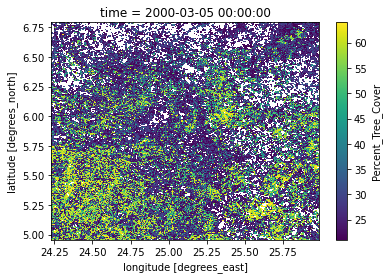

In [23]:
TC_MOD44B[0].plot()

In [24]:
Sr = xr.open_dataset('/home/chandra/data/Stable_unstable_paper/Sr_netcdf.nc').mle_gumbel_Layer[::-1].sel(lat = slice(geometry[2,1],geometry[0,1]), 
                                                                                            lon = slice(geometry[0,0],geometry[2,0]))
Sr

<xarray.DataArray 'mle_gumbel_Layer' (lat: 7, lon: 7)>
array([[365.77057, 361.04245, 335.52774, 336.94678, 305.72913, 308.15454,
        317.7593 ],
       [385.25635, 362.86688, 323.55154, 340.87045, 309.29544, 336.29352,
        350.84247],
       [349.56277, 355.1089 , 295.17245, 290.95352, 294.51572, 329.7613 ,
        349.28238],
       [327.49844, 337.30972, 304.09323, 328.63998, 336.99554, 337.719  ,
        329.14697],
       [324.90118, 324.7083 , 319.00714, 349.78488, 345.5902 , 329.45767,
        296.33823],
       [342.3593 , 320.43295, 323.94165, 339.7324 , 373.78088, 368.86462,
        335.7986 ],
       [367.32962, 350.64752, 324.4973 , 333.0817 , 328.43597, 327.8001 ,
        330.79462]], dtype=float32)
Coordinates:
  * lon      (lon) float64 24.38 24.62 24.88 25.12 25.38 25.62 25.88
  * lat      (lat) float64 5.125 5.375 5.625 5.875 6.125 6.375 6.625
Attributes:
    long_name:       mle_gumbel_Layer
    esri_pe_string:  GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1...
    units:           Degree

In [25]:
SPEI_PM = xr.open_dataset('/home/chandra/data/Stable_unstable_paper/spei12_PM.nc').spei.sel(lat = slice(geometry[2,1],geometry[0,1]), 
                                                                                            lon = slice(geometry[0,0],geometry[2,0]),
                                                                                            time = slice('2000','2018'))
SPEI_PM = SPEI_PM.mean(axis = (1,2))

In [26]:
Fire_summarized = []
for year in (range(2001,2020)):
    Fire = xr.open_mfdataset('/home/chandra/data/MCD64A1-Fire/FireCCI51_'+str(year)+'/'+str(year)+'*-ESACCI-L4_FIRE-BA-MODIS-fv5.1.1cds.nc').burned_area[:,::-1].sel(lat = slice(geometry[2,1],geometry[0,1]), 
                                                                                                lon = slice(geometry[0,0],geometry[2,0]));
    #Fire = np.max(Fire.sum(axis = (1,2)).values/(10**6))
    Fire = (Fire.sum(axis = (1,2)).values/(10**6))
    Fire_summarized.append(Fire.tolist())

<ipython-input-26-6ddf96af6c3d>:3: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  Fire = xr.open_mfdataset('/home/chandra/data/MCD64A1-Fire/FireCCI51_'+str(year)+'/'+str(year)+'*-ESACCI-L4_FIRE-BA-MODIS-fv5.1.1cds.nc').burned_area[:,::-1].sel(lat = slice(geometry[2,1],geometry[0,1]),
/usr/lib/python3/dist-packages/xarray/backends/api.py:934: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdatase

<ipython-input-33-61acc3bdf9e7>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels([' ',' ',' ',' ',-2,0,2], color = '#636363');


Text(2014, 10, 'Slope: 0.06')

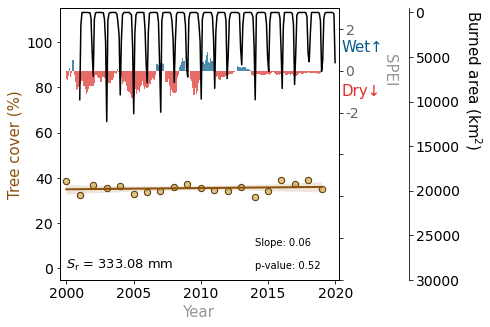

In [33]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

fig, ax = plt.subplots(1,1,figsize=(5,5))

ax.text(2000,0,str(r'$S_{\mathrm{r}}$ = '+str(round(float(Sr.median().values),2))+' mm'), fontsize = 13)

TC_MOD44B_mean = np.nanmean(TC_MOD44B, axis = (1,2))

ax2 = ax.twinx()
colormat=np.where(SPEI_PM.to_dataframe()['spei']>0, '#045a8d','#de2d26')
ax2.bar(np.linspace(2000,2018.9167,228), SPEI_PM, width = 0.083, alpha = 0.7, color = colormat, edgecolor = 'none')
ax2.set_ylim(-10,3);
ax2.set_yticklabels([' ',' ',' ',' ',-2,0,2], color = '#636363');
ax2.text(2020.5,0.90, 'Wet↑', fontsize = 15, rotation = 0, color = '#045a8d')
ax2.text(2020.5,-1.20, 'Dry↓', fontsize = 15, rotation = 0, color = '#de2d26')
ax.scatter(np.linspace(2000,2019,20), TC_MOD44B_mean, color='#dfc27d', s = 40, alpha = 1, edgecolor = '#543005')
sns.regplot(x=np.linspace(2000,2019,20), y=TC_MOD44B_mean, ci = 95, ax=ax, scatter = False, color = '#8c510a', line_kws={'lw': 2})
    
ax.set_ylim(-5,115)
ax.set_xlim(2000-0.5,2020+0.25)
ax.set_ylabel('Tree cover (%)', fontsize = 15, color = '#8c510a')
ax.set_xlabel('Year', fontsize = 15, color = '#969696')
ax.tick_params(axis='both', which='major', labelsize=14);
ax2.tick_params(axis='both', which='major', labelsize=14);
ax2.text(2023.5,-0.60, 'SPEI', fontsize = 15, rotation = 270, color = '#969696')

ax3 = ax.twinx()
p3, = ax3.plot(np.linspace(2001,2019.99,228), np.array(Fire_summarized).flatten(), color = 'black')
#ax3.axis["right"].label.set_color(p3.get_color())
ax3.spines['right'].set_position(('outward', 70))
#ax3.set_yticklabels([' ',0,1000,2000,' ',' ',' '], color = 'black', fontsize = '12');
ax3.set_ylim(ax.get_ylim()[::-1])
ax3.set_ylim(30000,-500)
ax3.text(2029.5,15000, r"Burned area (km$^2$)", fontsize = 15, rotation = 270, color = 'black')
ax3.tick_params(axis='both', which='major', labelsize=14);

y = np.linspace(2000,2019,20).reshape(-1,1)
X = TC_MOD44B_mean.reshape(-1,1)
reg = LinearRegression()
reg.fit(X, y)
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(np.linspace(2000,2019,20),TC_MOD44B_mean)

ax.text(2014,0,'p-value: '+str(round(est2.pvalues[1],2)))
#ax.text(2014,5,'R.sq: '+str(round(est2.rsquared,2)))
ax.text(2014,10,'Slope: '+str(round(slope,2)))

#### AF_c

In [34]:
geometry = np.array([[25.460937499999996, 1.9729192867499628],
          [25.460937499999996, 0.12760605230131244],
          [27.218749999999996, 0.12760605230131244],
          [27.218749999999996, 1.9729192867499628]])

In [35]:
TC_MOD44B = xr.open_dataset('/home/chandra/data/MOD44B_Treecover/Tropic_250m/MOD44B.006_250m_aid0001.nc').Percent_Tree_Cover[:,::-1].sel(lat = slice(geometry[2,1],geometry[0,1]), 
                                                                                                                                         lon = slice(geometry[0,0],geometry[2,0]))
TC_MOD44B = TC_MOD44B[:,:-1,:]
TC_MOD44B

<xarray.DataArray 'Percent_Tree_Cover' (time: 20, lat: 885, lon: 844)>
[14938800 values with dtype=float32]
Coordinates:
  * time     (time) object 2000-03-05 00:00:00 ... 2019-03-06 00:00:00
  * lat      (lat) float64 0.1281 0.1302 0.1323 0.1344 ... 1.966 1.968 1.97
  * lon      (lon) float64 25.46 25.46 25.47 25.47 ... 27.21 27.21 27.22 27.22
Attributes:
    grid_mapping:  crs
    valid_min:     0
    valid_max:     100
    long_name:     Percent_Tree_Cover

In [36]:
#TC_MOD44B = TC_MOD44B[:]

In [37]:
TC_MOD44B = TC_MOD44B.where(TC_MOD44B != 200)

In [38]:
TC_MOD44B = TC_MOD44B.where((TC_MOD44B > 20))

In [39]:
Landuse = xr.open_rasterio('/home/chandra/data/Paper2/Landuse_Globcover_250m_AF.tif')[0,::-1].sel(y = slice(geometry[2,1],geometry[0,1]), 
                                                                                          x = slice(geometry[0,0],geometry[2,0]))
#Landuse = Landuse[:-1]
for classes in [11,14,20,30,190,200,210,220]:
    Landuse = Landuse.where(Landuse != classes)
Landuse

<xarray.DataArray (y: 885, x: 844)>
array([[40., 40., 40., ..., 40., 40., 40.],
       [40., 40., 40., ..., 40., 40., 40.],
       [40., 40., 40., ..., 40., 40., 40.],
       ...,
       [40., 40., 40., ..., 40., 40., 40.],
       [nan, 40., 40., ..., 40., 40., 40.],
       [40., 40., 40., ..., 40., 40., 40.]])
Coordinates:
    band     int64 1
  * y        (y) float64 0.1295 0.1316 0.1337 0.1358 ... 1.965 1.967 1.969 1.971
  * x        (x) float64 25.46 25.46 25.47 25.47 ... 27.21 27.21 27.22 27.22
Attributes:
    transform:      (0.0020833333331467, 0.0, -20.001388888888897, 0.0, -0.00...
    crs:            +init=epsg:4326
    res:            (0.0020833333331467, 0.0020833333331467)
    is_tiled:       1
    nodatavals:     (nan,)
    scales:         (1.0,)
    offsets:        (0.0,)
    AREA_OR_POINT:  Area
    DataType:       Generic

In [40]:
TC_MOD44B = TC_MOD44B.where(Landuse.values > 0)

<ipython-input-40-6e84aafc7bbd>:1: RuntimeWarning: invalid value encountered in greater
  TC_MOD44B = TC_MOD44B.where(Landuse.values > 0)


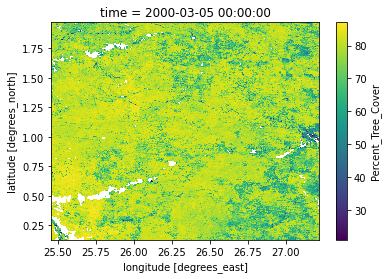

In [41]:
TC_MOD44B[0].plot()

In [42]:
Sr = xr.open_dataset('/home/chandra/data/Stable_unstable_paper/Sr_netcdf.nc').mle_gumbel_Layer[::-1].sel(lat = slice(geometry[2,1],geometry[0,1]), 
                                                                                            lon = slice(geometry[0,0],geometry[2,0]))
Sr

<xarray.DataArray 'mle_gumbel_Layer' (lat: 7, lon: 7)>
array([[151.97527, 135.66754, 130.39389, 133.72034, 144.70776, 141.67276,
        132.84235],
       [186.44191, 171.17691, 159.94644, 157.55635, 162.09065, 160.0822 ,
        164.82286],
       [212.87856, 205.89458, 189.52017, 187.08055, 194.00943, 189.22246,
        191.35791],
       [231.47617, 229.46352, 223.60565, 220.10968, 221.13359, 217.44301,
        235.34332],
       [236.61337, 236.55446, 242.73822, 237.91026, 235.8131 , 245.27661,
        244.36153],
       [254.2662 , 251.05113, 258.04416, 249.49709, 255.99796, 251.97632,
        251.76357],
       [269.68646, 261.74234, 257.06067, 255.5297 , 263.96982, 253.31934,
        234.0567 ]], dtype=float32)
Coordinates:
  * lon      (lon) float64 25.62 25.88 26.12 26.38 26.62 26.88 27.12
  * lat      (lat) float64 0.375 0.625 0.875 1.125 1.375 1.625 1.875
Attributes:
    long_name:       mle_gumbel_Layer
    esri_pe_string:  GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1...
    units:           Degree

In [43]:
SPEI_PM = xr.open_dataset('/home/chandra/data/Stable_unstable_paper/spei12_PM.nc').spei.sel(lat = slice(geometry[2,1],geometry[0,1]), 
                                                                                            lon = slice(geometry[0,0],geometry[2,0]),
                                                                                            time = slice('2000','2018'))
SPEI_PM = SPEI_PM.mean(axis = (1,2))

In [44]:
Fire_summarized = []
for year in (range(2001,2020)):
    Fire = xr.open_mfdataset('/home/chandra/data/MCD64A1-Fire/FireCCI51_'+str(year)+'/'+str(year)+'*-ESACCI-L4_FIRE-BA-MODIS-fv5.1.1cds.nc').burned_area[:,::-1].sel(lat = slice(geometry[2,1],geometry[0,1]), 
                                                                                                lon = slice(geometry[0,0],geometry[2,0]))
    #Fire = np.max(Fire.sum(axis = (1,2)).values/(10**6))
    Fire = (Fire.sum(axis = (1,2)).values/(10**6))
    Fire_summarized.append(Fire.tolist())

<ipython-input-44-c5c0eabd1099>:3: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  Fire = xr.open_mfdataset('/home/chandra/data/MCD64A1-Fire/FireCCI51_'+str(year)+'/'+str(year)+'*-ESACCI-L4_FIRE-BA-MODIS-fv5.1.1cds.nc').burned_area[:,::-1].sel(lat = slice(geometry[2,1],geometry[0,1]),
/usr/lib/python3/dist-packages/xarray/backends/api.py:934: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdatase

<ipython-input-45-05bb9c2d4c51>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels([' ',' ',' ',' ',-2,0,2], color = '#636363');


Text(2014, 10, 'Slope: 0.02')

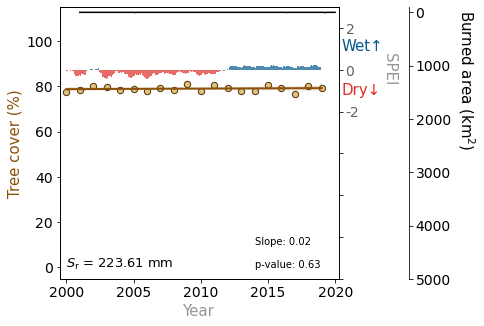

In [45]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

fig, ax = plt.subplots(1,1,figsize=(5,5))

ax.text(2000,0,str(r'$S_{\mathrm{r}}$ = '+str(round(float(Sr.median().values),2))+' mm'), fontsize = 13)

TC_MOD44B_mean = np.nanmean(TC_MOD44B, axis = (1,2))

ax2 = ax.twinx()
colormat=np.where(SPEI_PM.to_dataframe()['spei']>0, '#045a8d','#de2d26')
ax2.bar(np.linspace(2000,2018.9167,228), SPEI_PM, width = 0.083, alpha = 0.7, color = colormat, edgecolor = 'none')
ax2.set_ylim(-10,3);
ax2.set_yticklabels([' ',' ',' ',' ',-2,0,2], color = '#636363');
ax2.text(2020.5,0.90, 'Wet↑', fontsize = 15, rotation = 0, color = '#045a8d')
ax2.text(2020.5,-1.20, 'Dry↓', fontsize = 15, rotation = 0, color = '#de2d26')
ax.scatter(np.linspace(2000,2019,20), TC_MOD44B_mean, color='#dfc27d', s = 40, alpha = 1, edgecolor = '#543005')
sns.regplot(x=np.linspace(2000,2019,20), y=TC_MOD44B_mean, ci = 95, ax=ax, scatter = False, color = '#8c510a', line_kws={'lw': 2})
    
ax.set_ylim(-5,115)
ax.set_xlim(2000-0.5,2020+0.25)
ax.set_ylabel('Tree cover (%)', fontsize = 15, color = '#8c510a')
ax.set_xlabel('Year', fontsize = 15, color = '#969696')
ax.tick_params(axis='both', which='major', labelsize=14);
ax2.tick_params(axis='both', which='major', labelsize=14);
ax2.text(2023.5,-0.60, 'SPEI', fontsize = 15, rotation = 270, color = '#969696')

ax3 = ax.twinx()
p3, = ax3.plot(np.linspace(2001,2019.99,228), np.array(Fire_summarized).flatten(), color = 'black')
#ax3.axis["right"].label.set_color(p3.get_color())
ax3.spines['right'].set_position(('outward', 70))
#ax3.set_yticklabels([' ',0,1000,2000,' ',' ',' '], color = 'black', fontsize = '12');
ax3.set_ylim(ax.get_ylim()[::-1])
ax3.set_ylim(5000,-100)
ax3.text(2029,2500, r"Burned area (km$^2$)", fontsize = 15, rotation = 270, color = 'black')
ax3.tick_params(axis='both', which='major', labelsize=14);

y = np.linspace(2000,2019,20).reshape(-1,1)
X = TC_MOD44B_mean.reshape(-1,1)
reg = LinearRegression()
reg.fit(X, y)
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(np.linspace(2000,2019,20),TC_MOD44B_mean)

ax.text(2014,0,'p-value: '+str(round(est2.pvalues[1],2)))
#ax.text(2014,5,'R.sq: '+str(round(est2.rsquared,2)))
ax.text(2014,10,'Slope: '+str(round(slope,2)))

### AF_d

In [46]:
geometry = np.array([[11.398437499999998, -0.8391607143780236],
          [11.398437499999998, -2.6839117630068805],
          [13.156249999999998, -2.6839117630068805],
          [13.156249999999998, -0.8391607143780236]])

In [47]:
TC_MOD44B = xr.open_dataset('/home/chandra/data/MOD44B_Treecover/Tropic_250m/MOD44B.006_250m_aid0001.nc').Percent_Tree_Cover[:,::-1].sel(lat = slice(geometry[2,1],geometry[0,1]), 
                                                                                                                                         lon = slice(geometry[0,0],geometry[2,0]))
TC_MOD44B

<xarray.DataArray 'Percent_Tree_Cover' (time: 20, lat: 885, lon: 844)>
[14938800 values with dtype=float32]
Coordinates:
  * time     (time) object 2000-03-05 00:00:00 ... 2019-03-06 00:00:00
  * lat      (lat) float64 -2.682 -2.68 -2.678 ... -0.8448 -0.8427 -0.8406
  * lon      (lon) float64 11.4 11.4 11.4 11.41 ... 13.15 13.15 13.15 13.16
Attributes:
    grid_mapping:  crs
    valid_min:     0
    valid_max:     100
    long_name:     Percent_Tree_Cover

In [48]:
#TC_MOD44B = TC_MOD44B[:]

In [49]:
TC_MOD44B = TC_MOD44B.where(TC_MOD44B != 200)

In [50]:
TC_MOD44B = TC_MOD44B.where((TC_MOD44B > 20) & (TC_MOD44B < 65))

In [51]:
Landuse = xr.open_rasterio('/home/chandra/data/Paper2/Landuse_Globcover_250m_AF.tif')[0,::-1].sel(y = slice(geometry[2,1],geometry[0,1]), 
                                                                                          x = slice(geometry[0,0],geometry[2,0]))
#Landuse = Landuse[:-1]
for classes in [11,14,20,30,190,200,210,220]:
    Landuse = Landuse.where(Landuse != classes)
Landuse = Landuse[:-1,:]
Landuse

<xarray.DataArray (y: 885, x: 844)>
array([[nan, nan, nan, ..., 40., 40., 40.],
       [nan, nan, nan, ..., 40., 40., 40.],
       [nan, nan, nan, ..., 40., 40., 40.],
       ...,
       [40., 40., 40., ..., 40., 40., 40.],
       [40., 40., 40., ..., 40., 40., 40.],
       [40., 40., 40., ..., 40., 40., 40.]])
Coordinates:
    band     int64 1
  * y        (y) float64 -2.683 -2.681 -2.679 -2.677 ... -0.8455 -0.8434 -0.8413
  * x        (x) float64 11.4 11.4 11.4 11.41 11.41 ... 13.15 13.15 13.15 13.16
Attributes:
    transform:      (0.0020833333331467, 0.0, -20.001388888888897, 0.0, -0.00...
    crs:            +init=epsg:4326
    res:            (0.0020833333331467, 0.0020833333331467)
    is_tiled:       1
    nodatavals:     (nan,)
    scales:         (1.0,)
    offsets:        (0.0,)
    AREA_OR_POINT:  Area
    DataType:       Generic

In [52]:
TC_MOD44B = TC_MOD44B.where(Landuse.values > 0)

<ipython-input-52-6e84aafc7bbd>:1: RuntimeWarning: invalid value encountered in greater
  TC_MOD44B = TC_MOD44B.where(Landuse.values > 0)


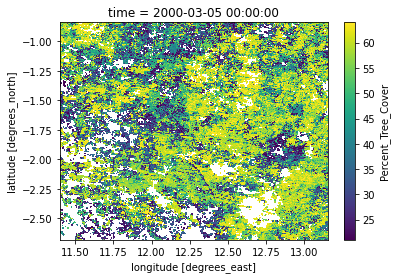

In [53]:
TC_MOD44B[0].plot()

In [54]:
Sr = xr.open_dataset('/home/chandra/data/Stable_unstable_paper/Sr_netcdf.nc').mle_gumbel_Layer[::-1].sel(lat = slice(geometry[2,1],geometry[0,1]), 
                                                                                            lon = slice(geometry[0,0],geometry[2,0]))
Sr

<xarray.DataArray 'mle_gumbel_Layer' (lat: 8, lon: 7)>
array([[366.17255, 321.01596, 317.27786, 323.75803, 316.1837 , 336.40564,
        346.86298],
       [305.55283, 295.47983, 308.97684, 320.42932, 322.55765, 366.1054 ,
        358.57367],
       [282.5296 , 285.4066 , 291.20236, 309.24866, 322.18005, 349.3079 ,
        347.0723 ],
       [289.61398, 296.211  , 311.43652, 361.3496 , 354.20975, 375.55356,
        373.36642],
       [297.09595, 308.11807, 316.09134, 350.82974, 346.10464, 349.153  ,
        326.03726],
       [326.24905, 343.50906, 349.58823, 360.31857, 340.16003, 335.4752 ,
        319.90204],
       [317.24796, 334.38724, 351.56207, 364.3784 , 343.79517, 325.82095,
        315.15955],
       [309.09363, 332.89383, 343.74423, 336.05228, 316.06998, 301.8025 ,
        297.1871 ]], dtype=float32)
Coordinates:
  * lon      (lon) float64 11.62 11.88 12.12 12.38 12.62 12.88 13.12
  * lat      (lat) float64 -2.625 -2.375 -2.125 -1.875 ... -1.375 -1.125 -0.875
Attributes:
    long_name:       mle_gumbel_Layer
    esri_pe_string:  GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1...
    units:           Degree

In [55]:
SPEI_PM = xr.open_dataset('/home/chandra/data/Stable_unstable_paper/spei12_PM.nc').spei.sel(lat = slice(geometry[2,1],geometry[0,1]), 
                                                                                            lon = slice(geometry[0,0],geometry[2,0]),
                                                                                            time = slice('2000','2018'))
SPEI_PM = SPEI_PM.mean(axis = (1,2))

In [56]:
Fire_summarized = []
for year in (range(2001,2020)):
    Fire = xr.open_mfdataset('/home/chandra/data/MCD64A1-Fire/FireCCI51_'+str(year)+'/'+str(year)+'*-ESACCI-L4_FIRE-BA-MODIS-fv5.1.1cds.nc').burned_area[:,::-1].sel(lat = slice(geometry[2,1],geometry[0,1]), 
                                                                                                lon = slice(geometry[0,0],geometry[2,0]))
    #Fire = np.max(Fire.sum(axis = (1,2)).values/(10**6))
    Fire = (Fire.sum(axis = (1,2)).values/(10**6))
    Fire_summarized.append(Fire.tolist())

<ipython-input-56-c5c0eabd1099>:3: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  Fire = xr.open_mfdataset('/home/chandra/data/MCD64A1-Fire/FireCCI51_'+str(year)+'/'+str(year)+'*-ESACCI-L4_FIRE-BA-MODIS-fv5.1.1cds.nc').burned_area[:,::-1].sel(lat = slice(geometry[2,1],geometry[0,1]),
/usr/lib/python3/dist-packages/xarray/backends/api.py:934: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdatase

<ipython-input-57-a6c7d898a090>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels([' ',' ',' ',' ',-2,0,2], color = '#636363');


Text(2014, 10, 'Slope: 0.03')

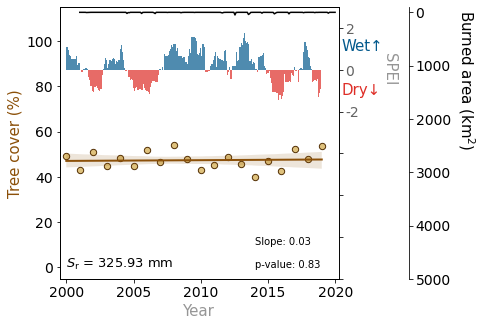

In [57]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

fig, ax = plt.subplots(1,1,figsize=(5,5))

ax.text(2000,0,str(r'$S_{\mathrm{r}}$ = '+str(round(float(Sr.median().values),2))+' mm'), fontsize = 13)

TC_MOD44B_mean = np.nanmean(TC_MOD44B, axis = (1,2))

ax2 = ax.twinx()
colormat=np.where(SPEI_PM.to_dataframe()['spei']>0, '#045a8d','#de2d26')
ax2.bar(np.linspace(2000,2018.9167,228), SPEI_PM, width = 0.083, alpha = 0.7, color = colormat, edgecolor = 'none')
ax2.set_ylim(-10,3);
ax2.set_yticklabels([' ',' ',' ',' ',-2,0,2], color = '#636363');
ax2.text(2020.5,0.90, 'Wet↑', fontsize = 15, rotation = 0, color = '#045a8d')
ax2.text(2020.5,-1.20, 'Dry↓', fontsize = 15, rotation = 0, color = '#de2d26')
ax.scatter(np.linspace(2000,2019,20), TC_MOD44B_mean, color='#dfc27d', s = 40, alpha = 1, edgecolor = '#543005')
sns.regplot(x=np.linspace(2000,2019,20), y=TC_MOD44B_mean, ci = 95, ax=ax, scatter = False, color = '#8c510a', line_kws={'lw': 2})
    
ax.set_ylim(-5,115)
ax.set_xlim(2000-0.5,2020+0.25)
ax.set_ylabel('Tree cover (%)', fontsize = 15, color = '#8c510a')
ax.set_xlabel('Year', fontsize = 15, color = '#969696')
ax.tick_params(axis='both', which='major', labelsize=14);
ax2.tick_params(axis='both', which='major', labelsize=14);
ax2.text(2023.5,-0.60, 'SPEI', fontsize = 15, rotation = 270, color = '#969696')

ax3 = ax.twinx()
p3, = ax3.plot(np.linspace(2001,2019.99,228), np.array(Fire_summarized).flatten(), color = 'black')
#ax3.axis["right"].label.set_color(p3.get_color())
ax3.spines['right'].set_position(('outward', 70))
#ax3.set_yticklabels([' ',0,1000,2000,' ',' ',' '], color = 'black', fontsize = '12');
ax3.set_ylim(ax.get_ylim()[::-1])
ax3.set_ylim(5000,-100)
ax3.text(2029,2500, r"Burned area (km$^2$)", fontsize = 15, rotation = 270, color = 'black')
ax3.tick_params(axis='both', which='major', labelsize=14);


y = np.linspace(2000,2019,20).reshape(-1,1)
X = TC_MOD44B_mean.reshape(-1,1)
reg = LinearRegression()
reg.fit(X, y)
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(np.linspace(2000,2019,20),TC_MOD44B_mean)

ax.text(2014,0,'p-value: '+str(round(est2.pvalues[1],2)))
#ax.text(2014,5,'R.sq: '+str(round(est2.rsquared,2)))
ax.text(2014,10,'Slope: '+str(round(slope,2)))

### AF_e

In [58]:
geometry = np.array([[35.568359375, -15.838604975444477],
          [35.568359375, -17.606170817135485],
          [37.326171875, -17.606170817135485],
          [37.326171875, -15.838604975444477]])

In [59]:
TC_MOD44B = xr.open_dataset('/home/chandra/data/MOD44B_Treecover/Tropic_250m/MOD44B.006_250m_aid0001.nc').Percent_Tree_Cover[:,::-1].sel(lat = slice(geometry[2,1],geometry[0,1]), 
                                                                                                                                         lon = slice(geometry[0,0],geometry[2,0]))
TC_MOD44B = TC_MOD44B[:,:,:]
TC_MOD44B

<xarray.DataArray 'Percent_Tree_Cover' (time: 20, lat: 848, lon: 844)>
[14314240 values with dtype=float32]
Coordinates:
  * time     (time) object 2000-03-05 00:00:00 ... 2019-03-06 00:00:00
  * lat      (lat) float64 -17.61 -17.6 -17.6 -17.6 ... -15.84 -15.84 -15.84
  * lon      (lon) float64 35.57 35.57 35.57 35.58 ... 37.32 37.32 37.32 37.33
Attributes:
    grid_mapping:  crs
    valid_min:     0
    valid_max:     100
    long_name:     Percent_Tree_Cover

In [60]:
#TC_MOD44B = TC_MOD44B[:]

In [61]:
TC_MOD44B = TC_MOD44B.where(TC_MOD44B != 200)

In [62]:
TC_MOD44B = TC_MOD44B.where((TC_MOD44B > 20) & (TC_MOD44B < 65))

In [63]:
Landuse = xr.open_rasterio('/home/chandra/data/Paper2/Landuse_Globcover_250m_AF.tif')[0,::-1].sel(y = slice(geometry[2,1],geometry[0,1]), 
                                                                                          x = slice(geometry[0,0],geometry[2,0]))
for classes in [11,14,20,30,190,200,210,220]:
    Landuse = Landuse.where(Landuse != classes)
Landuse = Landuse[:-1,:]
Landuse

<xarray.DataArray (y: 848, x: 844)>
array([[ 50.,  50.,  50., ...,  nan,  nan,  nan],
       [ 50.,  50.,  50., ...,  nan,  nan,  nan],
       [ 50.,  50.,  50., ...,  nan,  nan,  nan],
       ...,
       [ nan,  nan,  60., ...,  50.,  50.,  50.],
       [ nan,  nan,  60., ...,  50.,  50.,  50.],
       [130., 130.,  60., ...,  50.,  50.,  50.]])
Coordinates:
    band     int64 1
  * y        (y) float64 -17.61 -17.6 -17.6 -17.6 ... -15.85 -15.84 -15.84
  * x        (x) float64 35.57 35.57 35.57 35.57 ... 37.32 37.32 37.32 37.32
Attributes:
    transform:      (0.0020833333331467, 0.0, -20.001388888888897, 0.0, -0.00...
    crs:            +init=epsg:4326
    res:            (0.0020833333331467, 0.0020833333331467)
    is_tiled:       1
    nodatavals:     (nan,)
    scales:         (1.0,)
    offsets:        (0.0,)
    AREA_OR_POINT:  Area
    DataType:       Generic

In [64]:
TC_MOD44B = TC_MOD44B.where(Landuse.values > 0)

<ipython-input-64-6e84aafc7bbd>:1: RuntimeWarning: invalid value encountered in greater
  TC_MOD44B = TC_MOD44B.where(Landuse.values > 0)


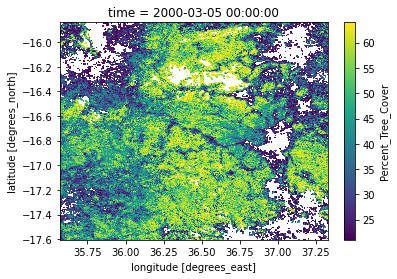

In [65]:
TC_MOD44B[0].plot()

In [66]:
Sr = xr.open_dataset('/home/chandra/data/Stable_unstable_paper/Sr_netcdf.nc').mle_gumbel_Layer[::-1].sel(lat = slice(geometry[2,1],geometry[0,1]), 
                                                                                            lon = slice(geometry[0,0],geometry[2,0]))
Sr

<xarray.DataArray 'mle_gumbel_Layer' (lat: 7, lon: 7)>
array([[487.45618, 459.74658, 464.70673, 512.39716, 526.0987 , 477.79678,
        513.8871 ],
       [469.50647, 464.62665, 460.59747, 466.98383, 426.86145, 432.7612 ,
        481.72012],
       [450.98755, 448.2595 , 420.60376, 415.64673, 418.19507, 394.3613 ,
        401.7407 ],
       [396.9571 , 377.0212 , 408.30896, 410.37216, 395.38516, 367.4565 ,
        403.38354],
       [366.79883, 386.606  , 402.09207, 419.5706 , 427.90674, 369.1801 ,
        359.40875],
       [348.00296, 357.61374, 411.58212, 419.03494, 422.23666, 332.89792,
        418.72806],
       [277.503  , 373.04703, 367.8211 , 377.51624, 370.7517 , 373.55856,
        459.80478]], dtype=float32)
Coordinates:
  * lon      (lon) float64 35.62 35.88 36.12 36.38 36.62 36.88 37.12
  * lat      (lat) float64 -17.38 -17.12 -16.88 -16.62 -16.38 -16.12 -15.88
Attributes:
    long_name:       mle_gumbel_Layer
    esri_pe_string:  GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1...
    units:           Degree

In [67]:
SPEI_PM = xr.open_dataset('/home/chandra/data/Stable_unstable_paper/spei12_PM.nc').spei.sel(lat = slice(geometry[2,1],geometry[0,1]), 
                                                                                            lon = slice(geometry[0,0],geometry[2,0]),
                                                                                            time = slice('2000','2018'))
SPEI_PM = SPEI_PM.mean(axis = (1,2))

In [68]:
Fire_summarized = []
for year in (range(2001,2020)):
    Fire = xr.open_mfdataset('/home/chandra/data/MCD64A1-Fire/FireCCI51_'+str(year)+'/'+str(year)+'*-ESACCI-L4_FIRE-BA-MODIS-fv5.1.1cds.nc').burned_area[:,::-1].sel(lat = slice(geometry[2,1],geometry[0,1]), 
                                                                                                lon = slice(geometry[0,0],geometry[2,0]))
    #Fire = np.max(Fire.sum(axis = (1,2)).values/(10**6))
    Fire = (Fire.sum(axis = (1,2)).values/(10**6))
    Fire_summarized.append(Fire.tolist())

<ipython-input-68-c5c0eabd1099>:3: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  Fire = xr.open_mfdataset('/home/chandra/data/MCD64A1-Fire/FireCCI51_'+str(year)+'/'+str(year)+'*-ESACCI-L4_FIRE-BA-MODIS-fv5.1.1cds.nc').burned_area[:,::-1].sel(lat = slice(geometry[2,1],geometry[0,1]),
/usr/lib/python3/dist-packages/xarray/backends/api.py:934: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdatase

<ipython-input-69-8d527d4f4a37>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels([' ',' ',' ',' ',-2,0,2], color = '#636363');


Text(2014, 10, 'Slope: -0.33')

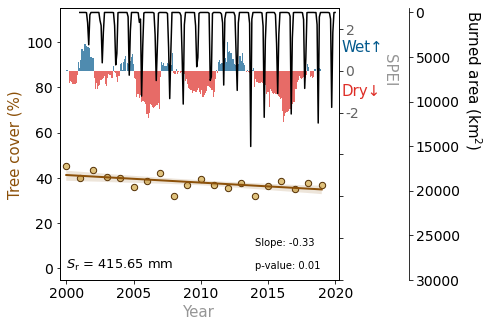

In [69]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

fig, ax = plt.subplots(1,1,figsize=(5,5))

ax.text(2000,0,str(r'$S_{\mathrm{r}}$ = '+str(round(float(Sr.median().values),2))+' mm'), fontsize = 13)

TC_MOD44B_mean = np.nanmean(TC_MOD44B, axis = (1,2))

ax2 = ax.twinx()
colormat=np.where(SPEI_PM.to_dataframe()['spei']>0, '#045a8d','#de2d26')
ax2.bar(np.linspace(2000,2018.9167,228), SPEI_PM, width = 0.083, alpha = 0.7, color = colormat, edgecolor = 'none')
ax2.set_ylim(-10,3);
ax2.set_yticklabels([' ',' ',' ',' ',-2,0,2], color = '#636363');
ax2.text(2020.5,0.90, 'Wet↑', fontsize = 15, rotation = 0, color = '#045a8d')
ax2.text(2020.5,-1.20, 'Dry↓', fontsize = 15, rotation = 0, color = '#de2d26')
ax.scatter(np.linspace(2000,2019,20), TC_MOD44B_mean, color='#dfc27d', s = 40, alpha = 1, edgecolor = '#543005')
sns.regplot(x=np.linspace(2000,2019,20), y=TC_MOD44B_mean, ci = 95, ax=ax, scatter = False, color = '#8c510a', line_kws={'lw': 2})
    
ax.set_ylim(-5,115)
ax.set_xlim(2000-0.5,2020+0.25)
ax.set_ylabel('Tree cover (%)', fontsize = 15, color = '#8c510a')
ax.set_xlabel('Year', fontsize = 15, color = '#969696')
ax.tick_params(axis='both', which='major', labelsize=14);
ax2.tick_params(axis='both', which='major', labelsize=14);
ax2.text(2023.5,-0.60, 'SPEI', fontsize = 15, rotation = 270, color = '#969696')

ax3 = ax.twinx()
#ax3.set_ylabel(r"Burned area (km$^2$)", fontsize = '14', rotation = 270)
p3, = ax3.plot(np.linspace(2001,2019.99,228), np.array(Fire_summarized).flatten(), color = 'black')
#ax3.axis["right"].label.set_color(p3.get_color())
ax3.spines['right'].set_position(('outward', 70))
#ax3.set_yticklabels([' ',0,1000,2000,' ',' ',' '], color = 'black', fontsize = '12');
ax3.set_ylim(ax.get_ylim()[::-1])
ax3.set_ylim(30000,-500)
ax3.text(2029.5,15000, r"Burned area (km$^2$)", fontsize = 15, rotation = 270, color = 'black')
ax3.tick_params(axis='both', which='major', labelsize=14);


y = np.linspace(2000,2019,20).reshape(-1,1)
X = TC_MOD44B_mean.reshape(-1,1)
reg = LinearRegression()
reg.fit(X, y)
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()

from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(np.linspace(2000,2019,20),TC_MOD44B_mean)

ax.text(2014,0,'p-value: '+str(round(est2.pvalues[1],2)))
#ax.text(2014,5,'R.sq: '+str(round(est2.rsquared,2)))
ax.text(2014,10,'Slope: '+str(round(slope,2)))